# An attempt to analyze kaggle-survey-2020

Author: Anshul Verma

Date: $05^{th}$. January. 2021

Revision: 2.00

In [1]:
# importing all the essential packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno
import pycountry
import operator
import plotly.express as px
import plotly.graph_objects as go
from ggplot import *
!pip install venndata
from venndata import venn
from plotly.subplots import make_subplots

import os
# listing the content of the dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


In [2]:
df = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')

print(f'Length of the dataframe is {len(df)}')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Length of the dataframe is 20037


## Checking how the dataframe looks like

In [3]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


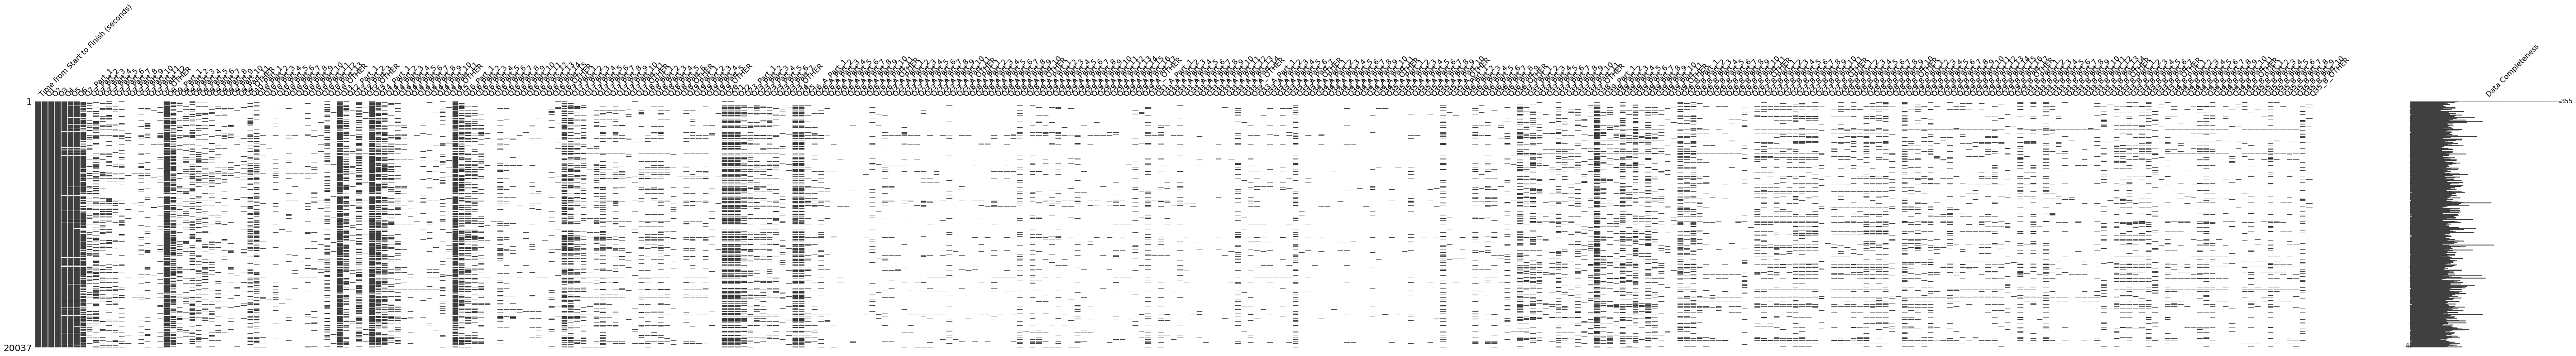

In [4]:
# Checking the NaN s in the data
missingno.matrix(df, labels=True, figsize=(100, 10))
plt.show()

Looks like data has lot of NaNs, quite expected of a data coming out of a survey.

In [5]:
'''
Clearly the first row of the data-frame corresponds to questions 
and thus should not be used for analysis. So let's take it out.
'''
questions = df.iloc(0)[0]
df.drop(0, axis=0, inplace=True)

The survey consists of 39-Questions and certain specific answers to a particular question leads to an additional (earlier-choice specific or an extra) question. 

## Lets analyze the easy questions first Q1

age-group of people in the field

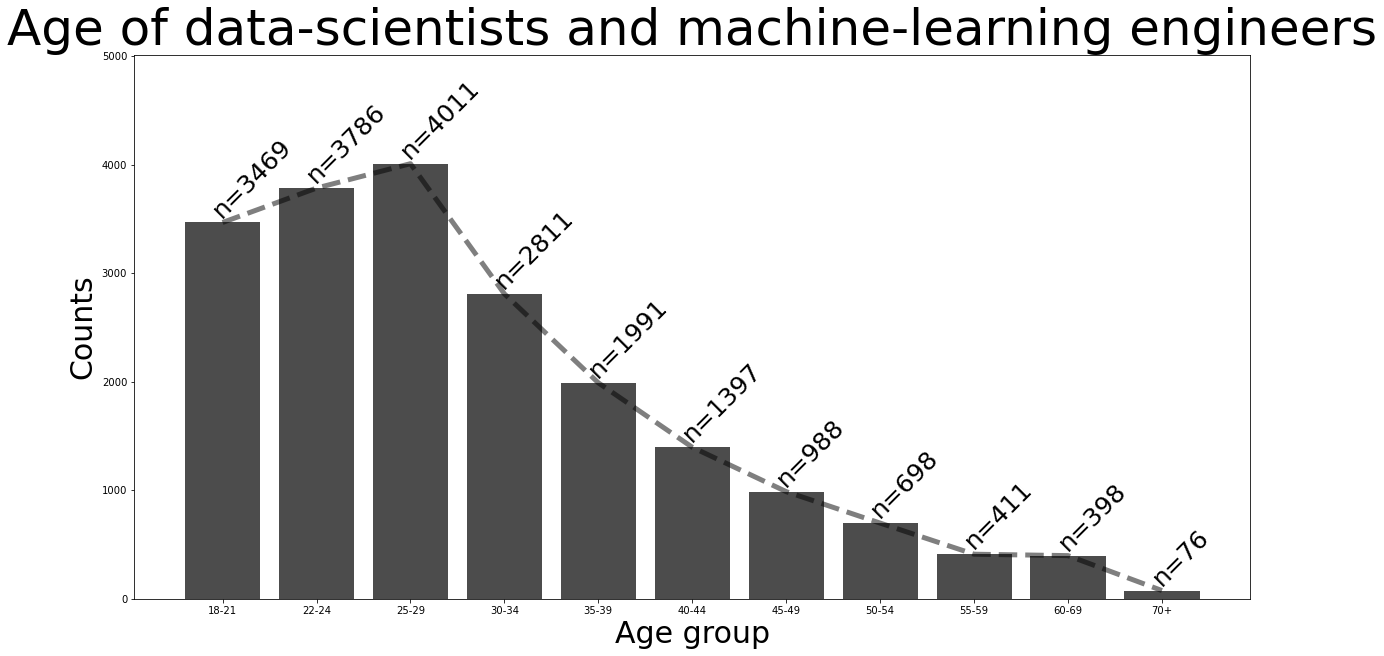

In [6]:
# Q1 corresponds to age lets visualize the age distribution of the data-scientists
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='Q1', data=df, ax=ax,
             order=np.unique(df['Q1'].values.tolist()),
             color = 'black',
             alpha=0.7)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+50, 'n=%.0f'%(height), fontsize=25, rotation=45)
age_grps, counts = np.unique(df['Q1'].values.tolist(), return_counts=True)
ax.plot(age_grps, counts, linestyle='--', color='k', linewidth=5, alpha=0.5)
ax.set_title('Age of data-scientists and machine-learning engineers', fontsize=50)
ax.set_ylabel('Counts', fontsize = 30)
ax.set_xlabel('Age group', fontsize= 30)
ax.set_ylim([0, max(counts)+1000])
plt.show()

Ahan !! quite a lot of young people are interested on AI, ML and DS. This just shows the recent expansion of the field and the increasing demand of data-scientists in recent years leading to more and more younger people getting pulled towards the field.

Lets see if duration people spent to fill the form and this duration has any correlation with the age-group. To see the distribution ignoring the duration more than 3 hours because the only way a survey would have taken over 3 hours is if someone lef the survey incomplete and completed it later.

In [7]:
# A function to properly round floating numbers
def proper_round(num, dec=0):
    '''
    num: floating number
    dec: number of points after decimal (by default: 0)
    '''
    num = str(num)[:str(num).index('.')+dec+2]
    if num[-1]>='5':
        return float(num[:-2-(not dec)]+str(int(num[-2-(not dec)])+1))
    return float(num[:-1])

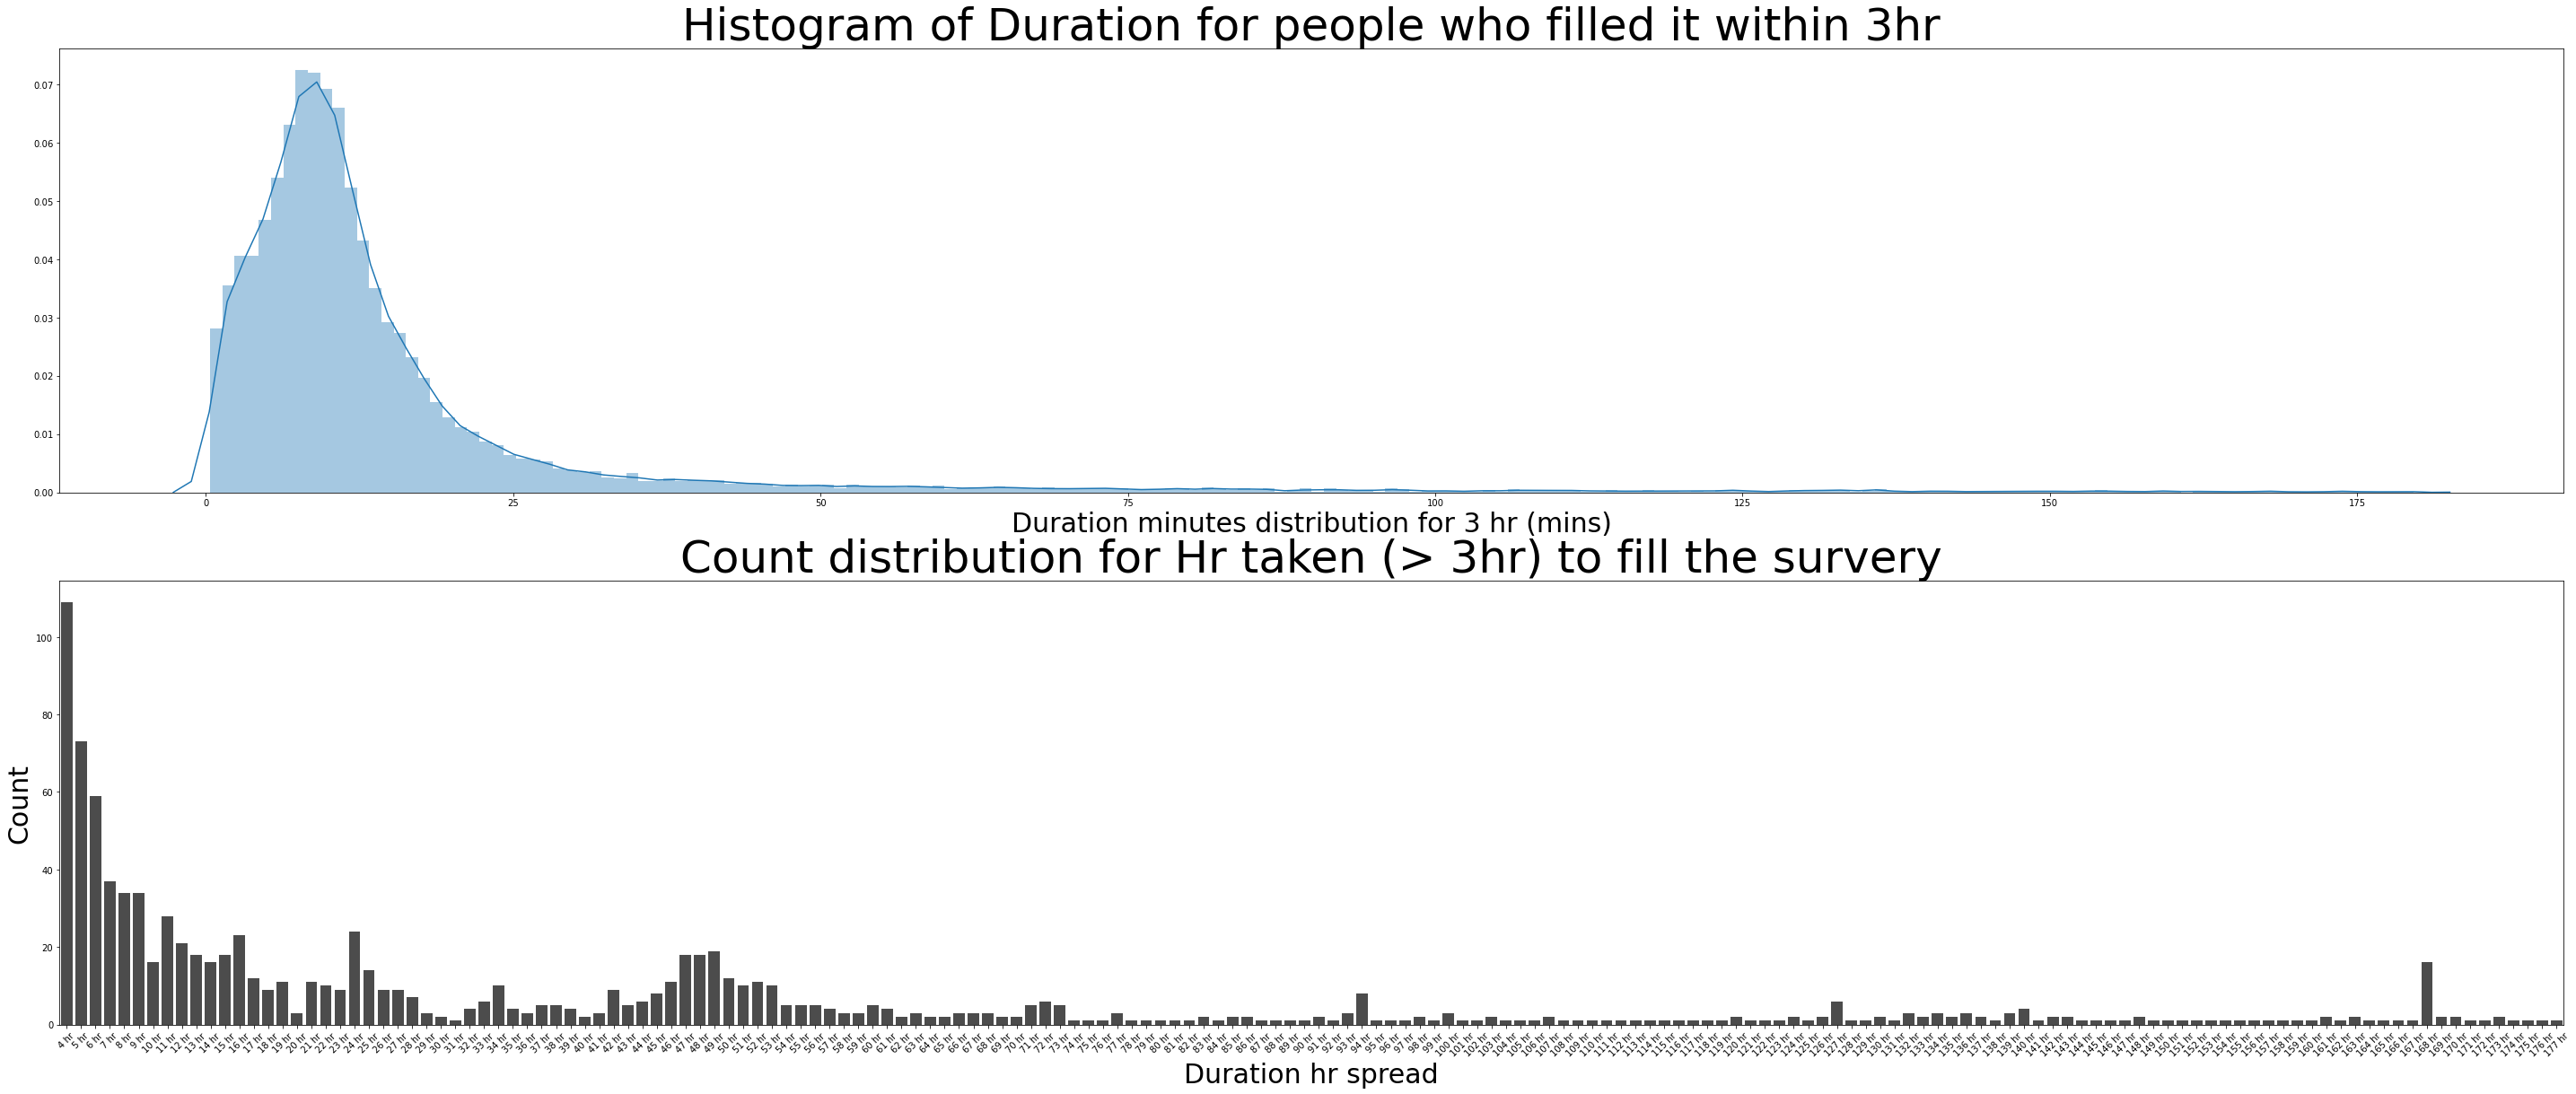

In [8]:
plt.figure(figsize = (50,20))
plt.subplot(2, 1, 1)
ax1 = sns.distplot([float(duration)/60 for duration in
                  df['Time from Start to Finish (seconds)'].values.tolist()
                 if int(duration)<(180*60)],
                bins= 180)
ax1.set_xlabel('Duration minutes distribution for 3 hr (mins)', fontsize=30)
ax1.set_title('Histogram of Duration for people who filled it within 3hr', fontsize=50)

plt.subplot(2, 1, 2)
ax2 = sns.countplot([int(proper_round(float(duration)/(60*60))) for duration in 
                     df['Time from Start to Finish (seconds)'].values.tolist()
                    if int(proper_round(float(duration)/(60*60))) > 3],
                   color='black', alpha=0.7)
ax2.set_xlabel('Duration hr spread', fontsize=30)
ax2.set_ylabel('Count', fontsize=30)
ax2.set_title('Count distribution for Hr taken (> 3hr) to fill the survery', fontsize=50)

max_hr = max([int(proper_round(float(duration)/(60*60))) for duration in 
                     df['Time from Start to Finish (seconds)'].values.tolist()])
x_label = np.linspace(4, max_hr, num=max_hr-3)
x_label= [f'{int(x)} hr' for x in x_label]
ax2.set_xticklabels(x_label, rotation=45, fontsize=10)
plt.show()

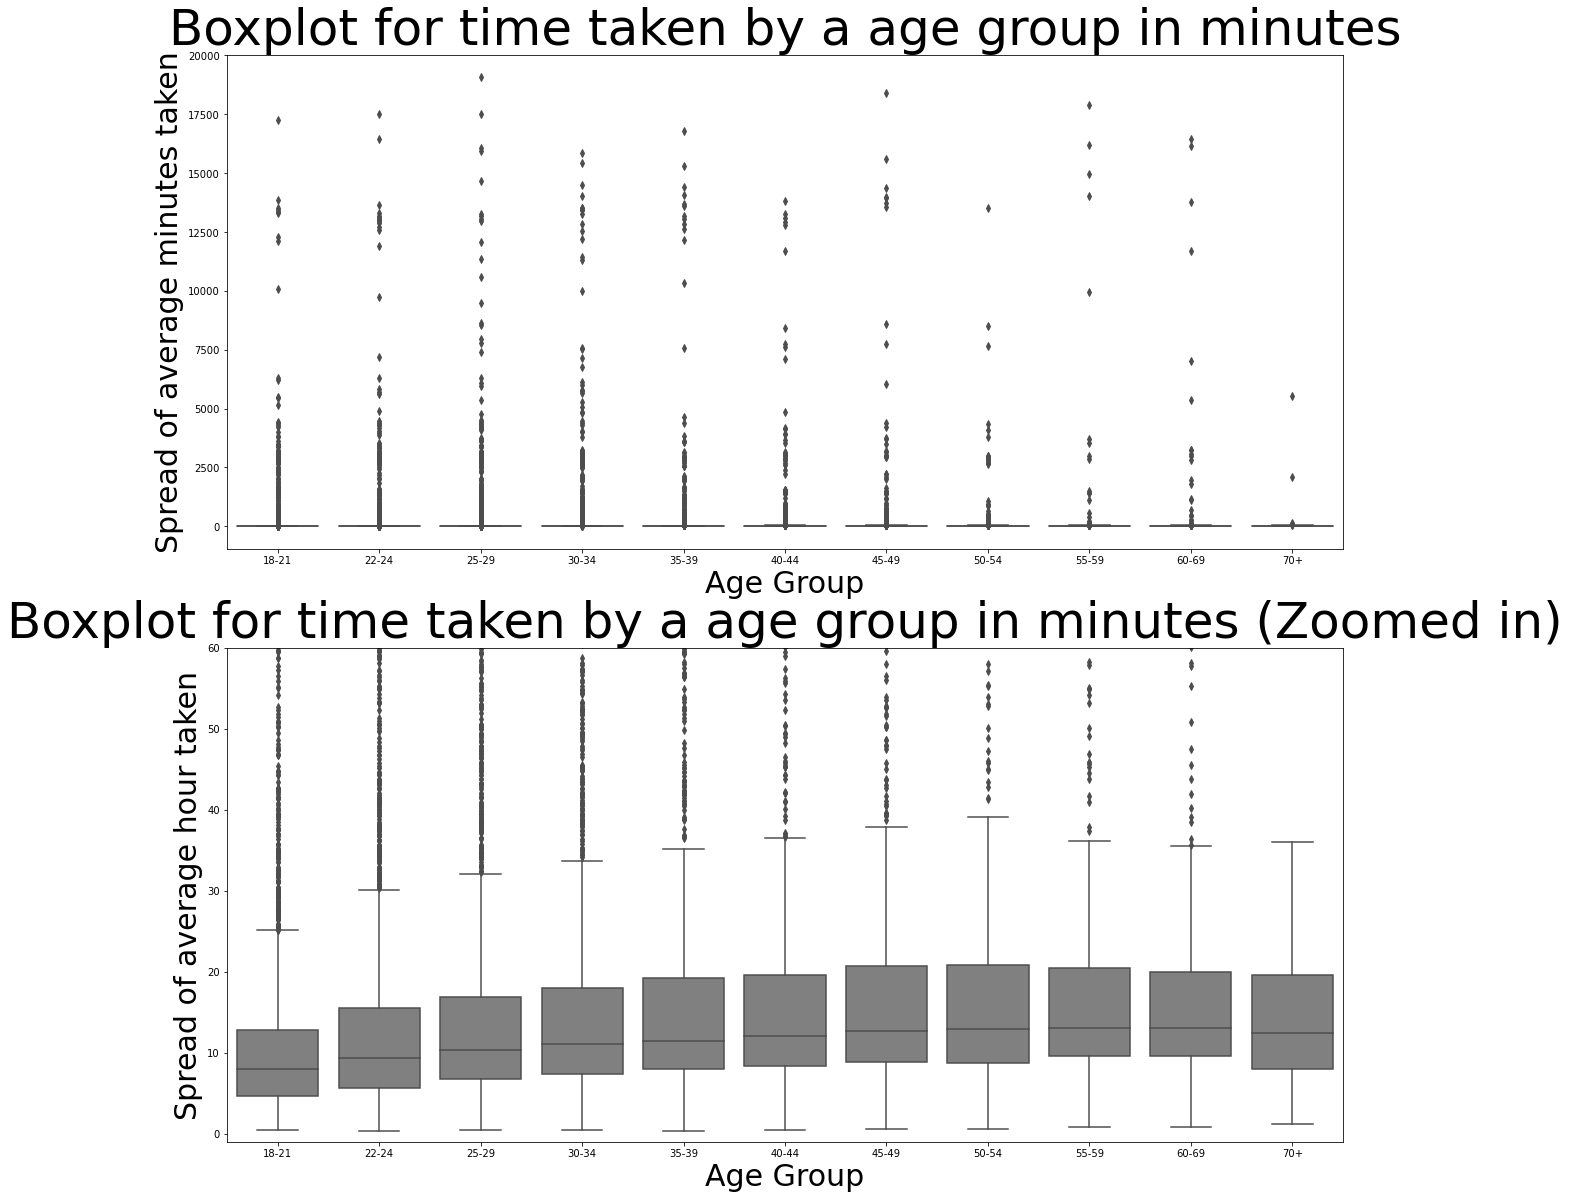

In [9]:
plt.figure(figsize = (20, 20))
plt.subplot(2, 1, 1)
ax1 = sns.boxplot(x=df['Q1'].values.tolist(), y=[float(duration)/60 for duration in
                  df['Time from Start to Finish (seconds)'].values.tolist()],
                  order=np.unique(df['Q1'].values.tolist()),
                  color='grey')
ax1.set_xlabel('Age Group', fontsize=30)
ax1.set_ylabel('Spread of average minutes taken', fontsize=30)
ax1.set_title('Boxplot for time taken by a age group in minutes', fontsize=50)

plt.subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['Q1'].values.tolist(), y=[float(duration)/60 for duration in
                  df['Time from Start to Finish (seconds)'].values.tolist()],
                  order=np.unique(df['Q1'].values.tolist()),
                  color='grey')
ax2.set_xlabel('Age Group', fontsize=30)
ax2.set_ylabel('Spread of average hour taken', fontsize=30)
ax2.set_ylim([-1, 60])
ax2.set_title('Boxplot for time taken by a age group in minutes (Zoomed in)', fontsize=50)
plt.show()

ta-da!! does look like younder people finished the survery slightly quicker. Not saying that they are quick. :P .... lol
Now then lets look at the gender distribution among people working in AI, ML and DS. 


## Now then lets look at Q3

country where the majority of Data scientists are. Intresting to deicde where to start your career as it can be related to number of opportunities or population.



In [10]:
countries, counts = np.unique(df['Q3'].values.tolist(), return_counts=True)
fig = px.pie(names=countries, values=counts,
            width=1500, height=1000,
            title='Survey counts from different countries')
fig.show()

Looks like India, USA, Brazil,and Japan have a lot of data-scientists.

## Gender-ratio is another interesting topic which we can look into Q2

Lets look at overall gender-ratio in the field.

In [11]:
genders, counts = np.unique(df['Q2'].values.tolist(), return_counts=True)
fig = px.pie(names=genders, values=counts,
            width=700, height=500,
            title='Gender distribution')
fig.show()

Looks like men are dominating the field.

Now then lets look at the gender distribution among different age groups and in different countries. 

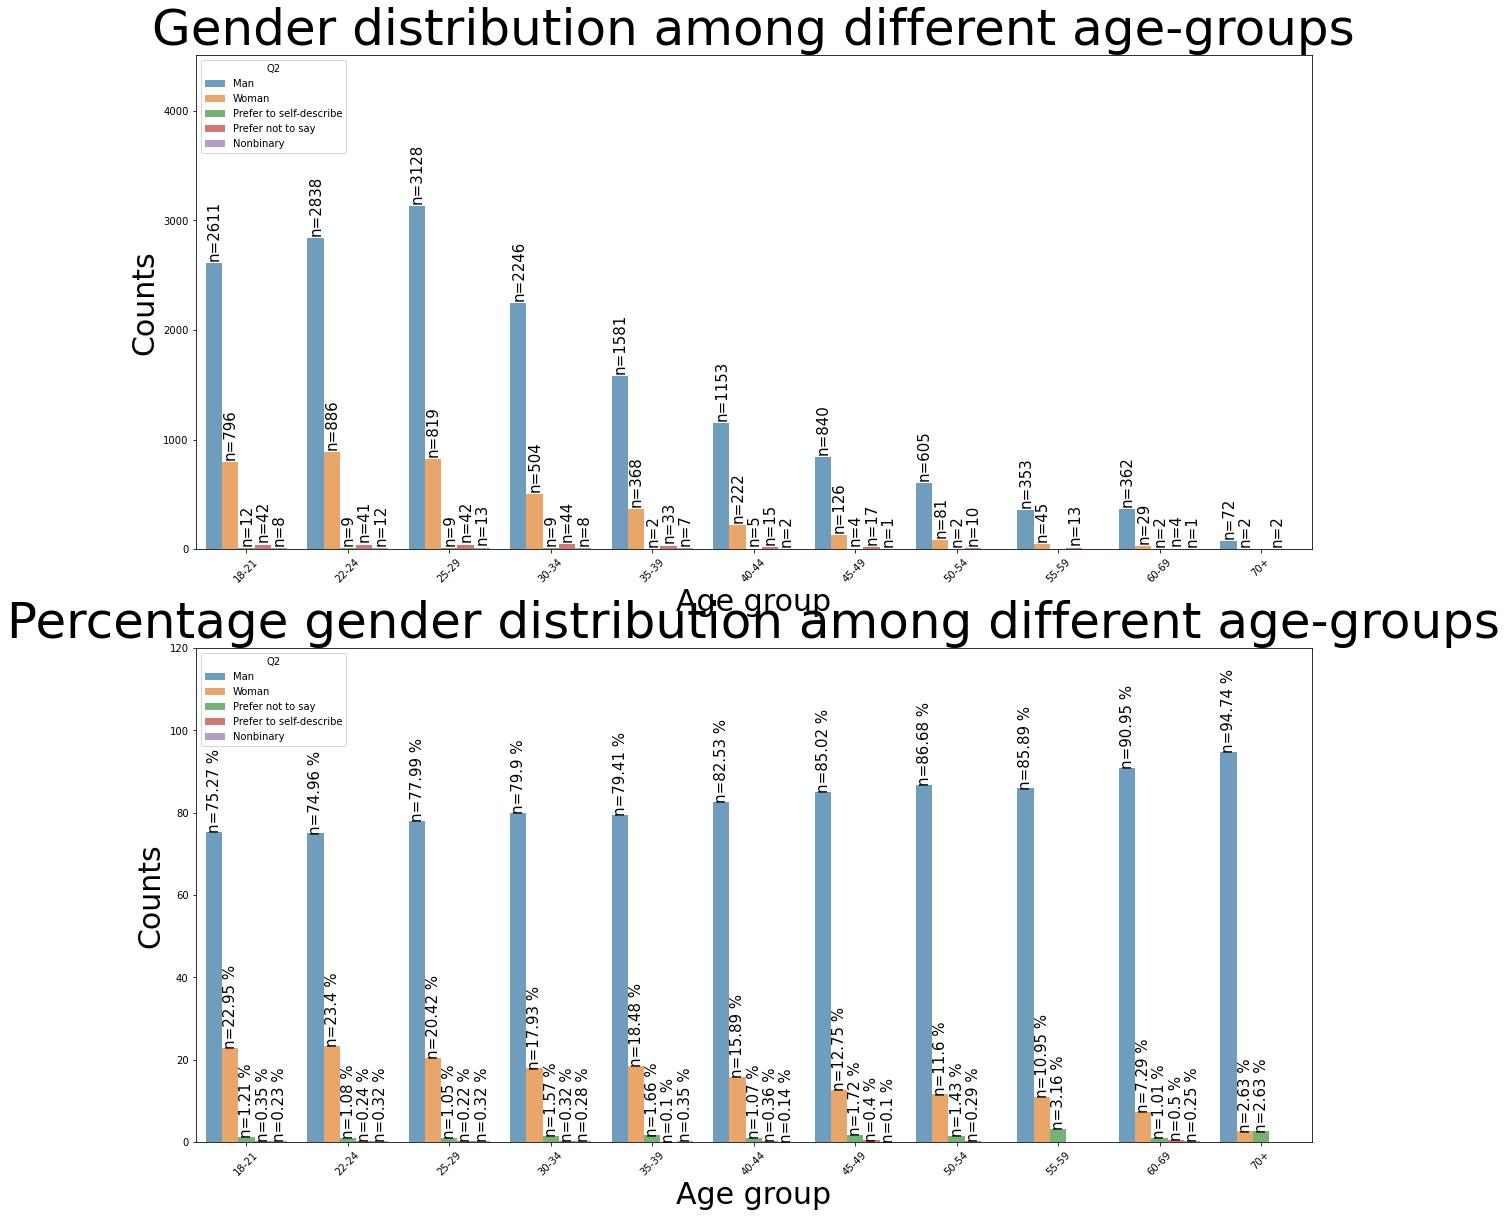

In [12]:
# Lets visualize the sex distribution among different age-groups
plt.figure(figsize=(20, 20))

plt.subplot(2,1,1)
ax1 = sns.countplot(x='Q1', hue='Q2', data=df,
                    order=np.unique(df['Q1'].values.tolist()), 
                    alpha=0.7)
age_grps, counts = np.unique(df['Q1'].values.tolist(), return_counts=True)    
for p in ax1.patches:
    height = p.get_height()
    try:
        txt=f'n={int(height)}'
    except:
        txt='n=0'
    ax1.text(p.get_x()+0.01, height+50, txt,
             fontsize=15, rotation=90)

ax1.set_title('Gender distribution among different age-groups', fontsize=50)
ax1.set_ylabel('Counts', fontsize = 30)
ax1.set_xlabel('Age group', fontsize= 30)
ax1.set_ylim([0, max(counts)+500])
ax1.tick_params(axis='x', rotation=45)

plt.subplot(2,1,2)
df1 = df.groupby('Q1')['Q2'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

ax2 = sns.barplot(x='Q1', y='percent', hue='Q2', data=df1,
                  order=np.unique(df1['Q1'].values.tolist()),
                  alpha=0.7)

for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+0.01, height+0.5, f'n={round(height, 2)} %',
             fontsize=15, rotation=90)  
    
ax2.set_title('Percentage gender distribution among different age-groups', fontsize=50)
ax2.set_ylabel('Counts', fontsize = 30)
ax2.set_xlabel('Age group', fontsize= 30)
ax2.set_ylim([0, 120])
ax2.tick_params(axis='x', rotation=45)
plt.show()

Looks like the younger generation has higher percentage of female employees. I hope this equality means keeps on increases as newer generations enter the field. Now lets see the gender ratio in different countries.

In [13]:
# A function to get count matrix from a datafrma columns
def cm_two_columns(df, col1, col2, norm=False, no_nan=True):
    '''
    df: dataframe
    col1: column 1 -> y
    col2: column 2 -> x
    norm: optional-argument to normalize the count-matrix
    no_nan: To remove NaNs
    '''
    uq_cols1 = np.unique(df[col1].values.tolist())
    uq_cols2 = np.unique(df[col2].values.tolist())
    if no_nan:
        if col1!='Q24' and col2!='Q24':
            uq_cols1 = [uq_col1 for uq_col1 in uq_cols1 if 'nan'!=uq_col1]
            uq_cols2 = [uq_col2 for uq_col2 in uq_cols2 if 'nan'!=uq_col2]
        elif col1=='Q24':
            uq_cols1 = [uq_col1 for uq_col1 in uq_cols1 if 'nan'!=uq_col1]
            uq_cols2 = [uq_col2 for uq_col2 in uq_cols2 if 'nan'!=uq_col2]
            #sort-col1
            ordered_compensations = [float(x.split('-')[0].split('> ')[-1].replace('$', '').replace(',', '')) for x in uq_cols1]
            uq_cols1 = [x for _, x in sorted(zip(ordered_compensations, uq_cols1))]

        else:
            uq_cols1 = [uq_col1 for uq_col1 in uq_cols1 if 'nan'!=uq_col1]
            uq_cols2 = [uq_col2 for uq_col2 in uq_cols2 if 'nan'!=uq_col2]
            #sort-col2
            ordered_compensations = [float(x.split('-')[0].split('> ')[-1].replace('$', '').replace(',', '')) for x in uq_cols2]
            uq_cols2 = [x for _, x in sorted(zip(ordered_compensations, uq_cols2))]
            
    cm = []
    for uq_col1 in uq_cols1:
        df_uq_col1 = df[df[col1]==uq_col1]
        col1_count = []
        for uq_col2 in uq_cols2:
            col1_count.append(len(df_uq_col1[df_uq_col1[col2]==uq_col2]))
        cm.append(col1_count)
    cm = np.array(cm)
    if norm:
        # (row)normalize-the matrix and return the normalized matrix
        total_counts = cm.sum(axis=1)
        norm_cm = cm/total_counts[:, np.newaxis]
        return norm_cm, uq_cols1, uq_cols2
    
    return cm, uq_cols1, uq_cols2

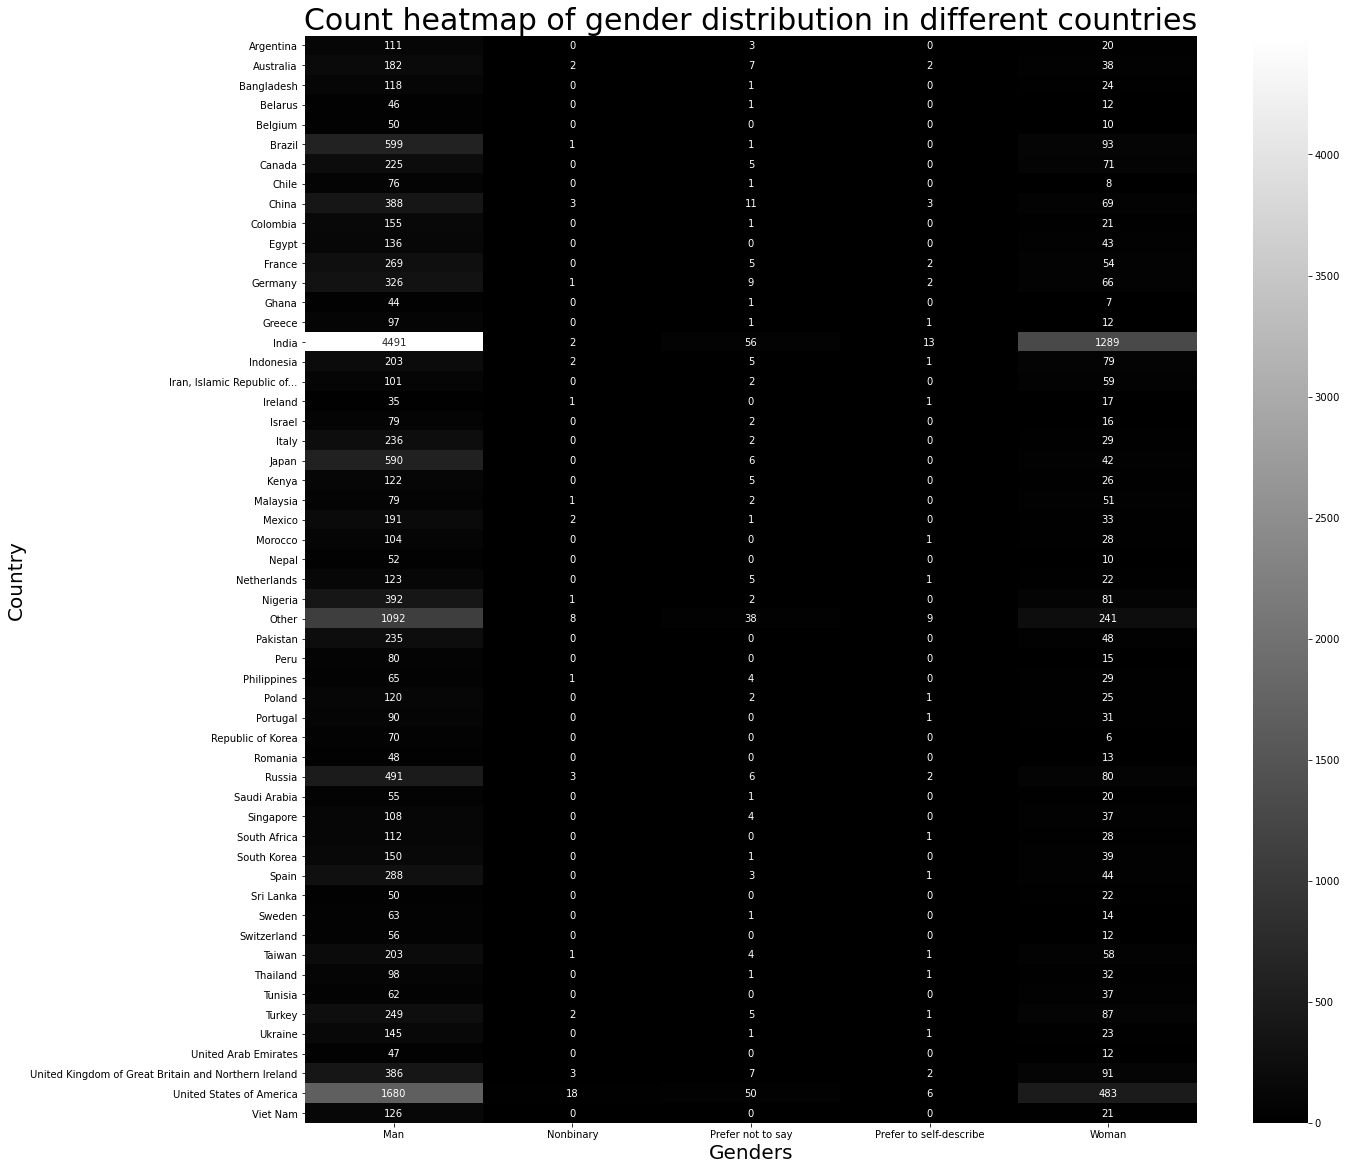

In [14]:
# Generating heatmap for different genders in different country
cm, countries, genders = cm_two_columns(df, 'Q3', 'Q2')
plt.figure(figsize=(20, 20))
sns.heatmap(pd.DataFrame(cm, index = countries, columns=genders),
            annot=True, cmap='gist_gray', fmt='g')
plt.title('Count heatmap of gender distribution in different countries', fontsize=30)
plt.xlabel('Genders', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.show()

Looks like men are not just dominating overall but are also dominating the field in every country. A gender-ratio for each country will be a better indicator for this. 

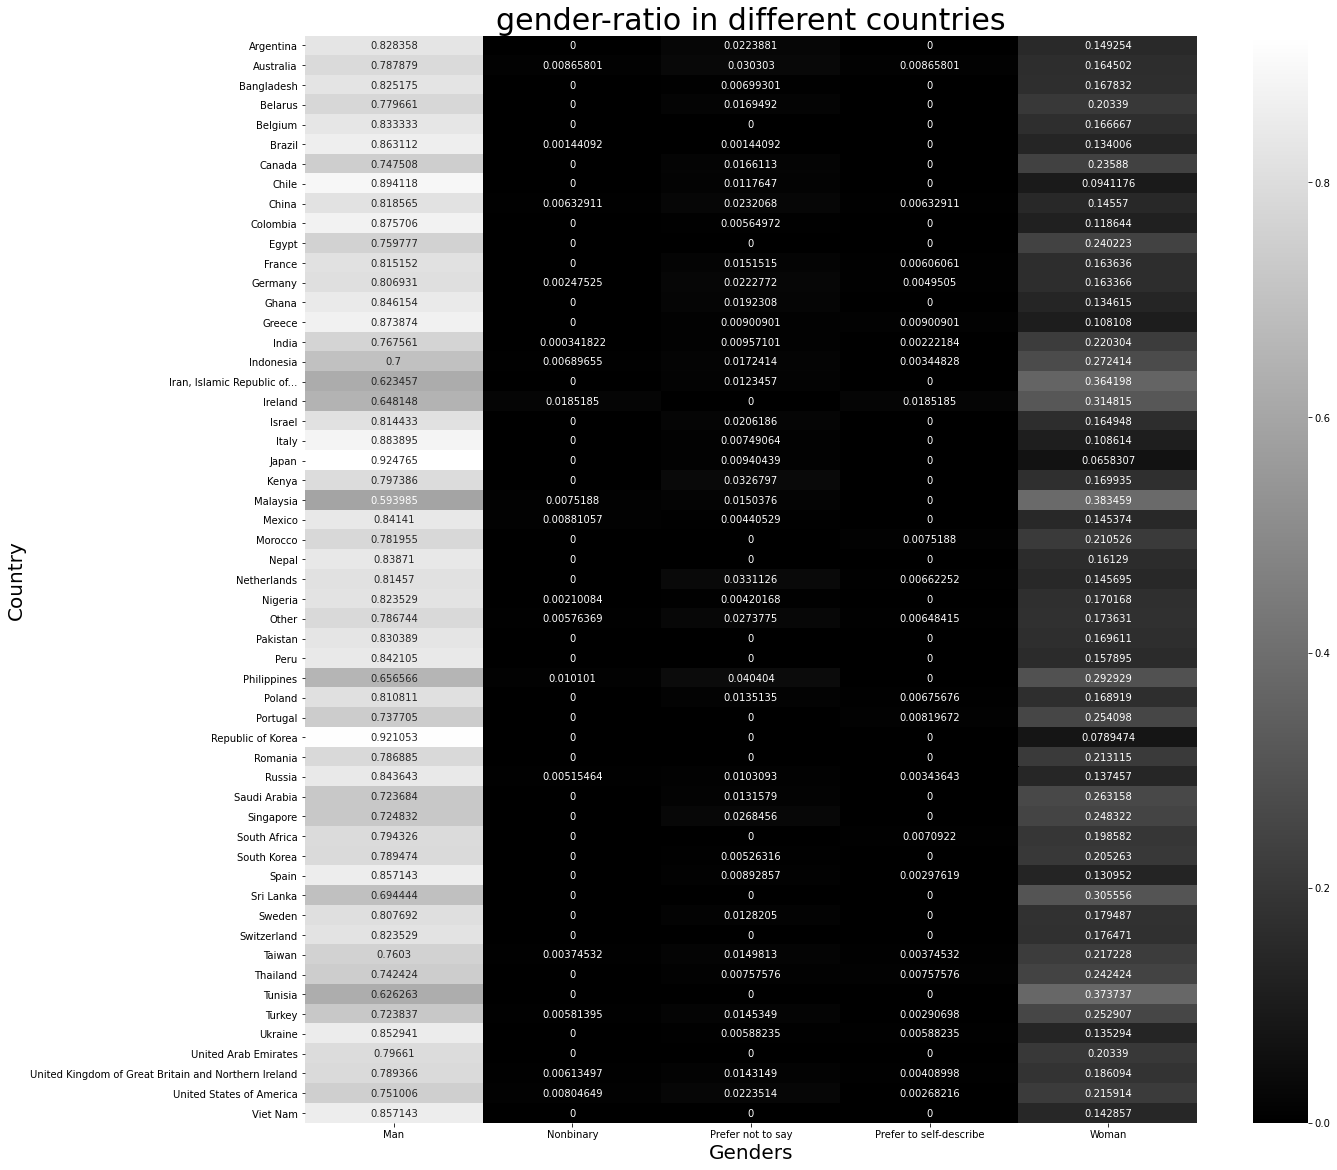

In [15]:
# seeing the sex-ratio in each country
norm_cm, countries, genders = cm_two_columns(df, 'Q3', 'Q2', norm=True)
plt.figure(figsize=(20, 20))
sns.heatmap(pd.DataFrame(norm_cm, index = countries, columns=genders),
            annot=True, cmap='gist_gray', fmt='g')
plt.title('gender-ratio in different countries', fontsize=30)
plt.xlabel('Genders', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.show()

Looks like Malaysia, Phillippines, Tunisia, Ierland, 'Iran, Islamic Republic of ...' has the best sex ratio amonf all the countries. Whereas Japan, Italy and Repulic of Korea can do with a better gender-ratio.

It can clearly be seen that South-American countries does not have very good gender ratio. Lets plot a pie-chart visualization of top six countries based on survey count.

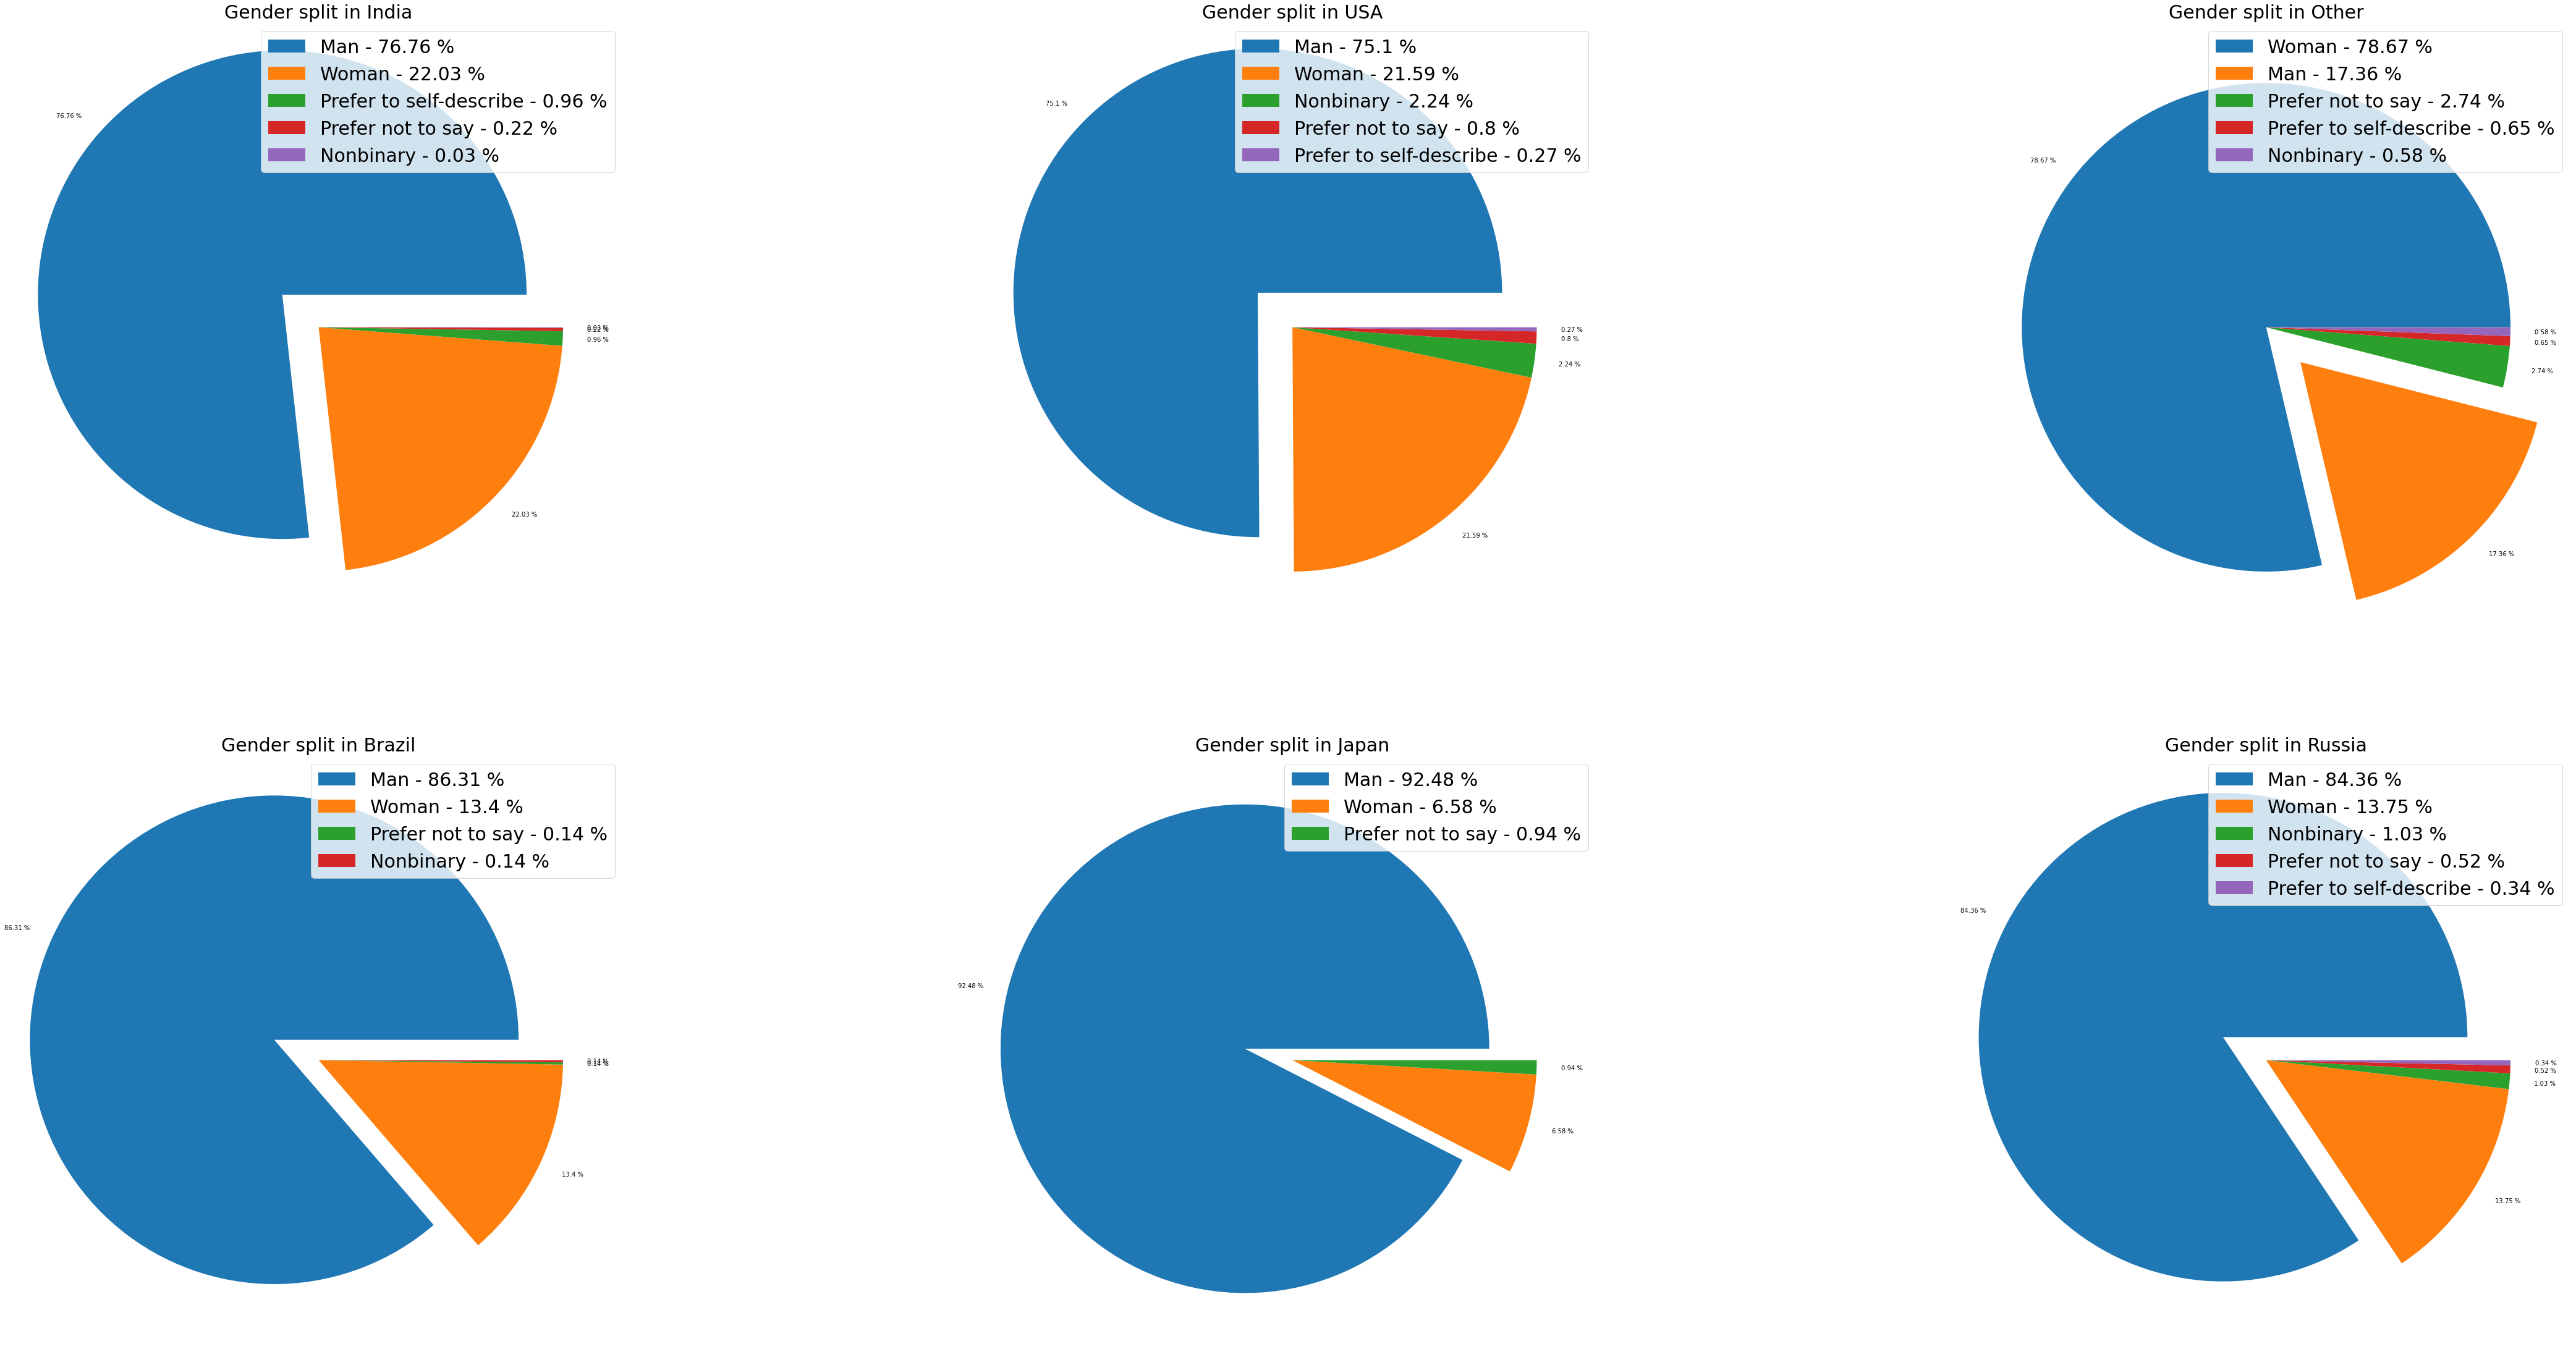

In [16]:
countries, counts = np.unique(df['Q3'].values.tolist(), return_counts=True)
countries_counts = {}
for country, count in zip(countries, counts):
    countries_counts[country] = count

countries_counts = sorted(countries_counts.items(), key=operator.itemgetter(1), reverse=True)
plt.figure(figsize=(80, 40))

for i, (country, _) in enumerate(countries_counts):
    if i < 6:
        df_country = df[df['Q3']==country]
        explode_vals=[]
        for x in df_country.Q2.unique():
            if x == 'Man':
                explode_vals.append(0.2)
            else:
                explode_vals.append(0)    
        plt.subplot(2, 3, i+1)
        percentages = ((df_country.Q2.value_counts()/sum(df_country.Q2.value_counts()))*100).values.tolist()
        plt.pie(x=percentages,
                explode=explode_vals,
                labels=[f'{round(i, 2)} %' for i in percentages])
        if country=='United States of America':
            plt.title(f'Gender split in USA', fontsize=30)
        else:
            plt.title(f'Gender split in {country}', fontsize=30)
        plt.legend(labels = [f'{con} - {round(i, 2)} %' for con, i in zip(df_country.Q2.unique(), percentages)],
                   fontsize=30, loc='best')
plt.show()

## Now then lets look at Q4 and Q5

Lets try and see if there is a particular education level prefered for a job-title in the field. A very intriguing question to decide if someone wants to do higher studies.

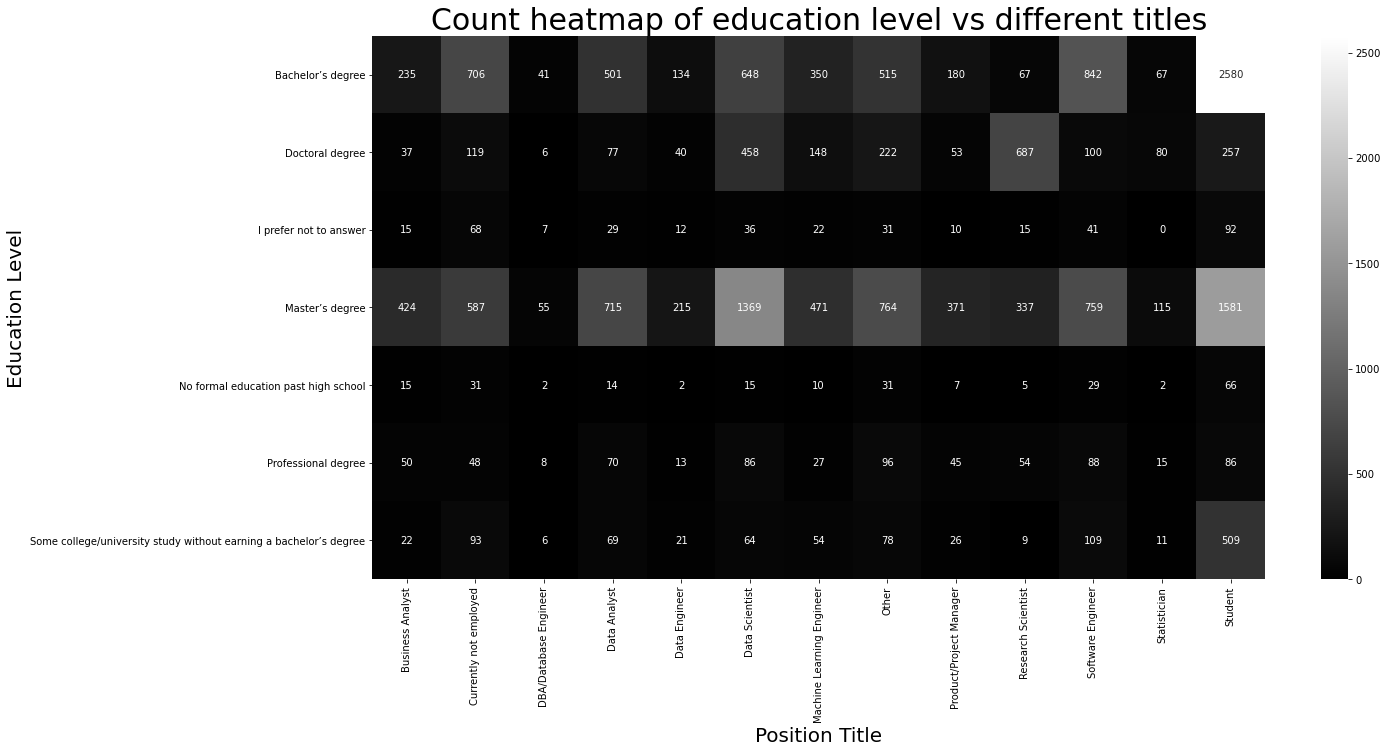

In [17]:
cm, education_lvl, positions = cm_two_columns(df, 'Q4', 'Q5')
plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(cm, index = education_lvl, columns=positions),
            annot=True, cmap='gist_gray', fmt='g')
plt.title('Count heatmap of education level vs different titles', fontsize=30)
plt.xlabel('Position Title', fontsize=20)
plt.ylabel('Education Level', fontsize=20)
plt.show()

Ahan !! clearly the **Research Scientists** postion is highle occupied by PhD and masters students. For **Data Scientists** there is quite an even spred among PhD, Masters and Bachelors degree holders, but it the count is not hugely supporting PhD degree requirements, But for **Data Analysts** it seems that Master's and Bachelor's degree is sufficient.

This is quite an expected behavoiour as more research-intensive the position is more important becomes a doctorate degree. Thus if an individual wants to work in a research-field he/she/zhe should probably consider doing a PhD.

Another factor which might influence a person's decision regrading higher studies is weather or not the higher level of education results in higher compensation.

## Lets look at Q24
Yearly Compensation, lets look at where are the high paid jobs are located.

**Droping** the rows where yearly compensation is *NaN* -> There are **10,729** rows after droping all the rows where compensation is *NaN*

In [18]:
df_no_nan_salary = df[df['Q24'].notna()].copy(deep=True)

# Consider salary > 100,000 USD
mt_100k = ['100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999',
          '250,000-299,999', '300,000-500,000', '> $500,000']

in_bw_40k_100k = ['40,000-49,999', '50,000-59,999', '60,000-69,999', 
                  '70,000-79,999', '80,000-89,999', '90,000-99,999']

sal_mt_100k = []
sal_bw_40k_100k = []
for sal in df_no_nan_salary['Q24'].values.tolist():
    if sal in mt_100k:
        sal_mt_100k.append(1)
    else:
        sal_mt_100k.append(0)
    if sal in in_bw_40k_100k:
        sal_bw_40k_100k.append(1)
    else:
        sal_bw_40k_100k.append(0)
        
df_no_nan_salary['sal_mt_100k'] = sal_mt_100k
df_no_nan_salary['sal_bw_40k_100k'] = sal_bw_40k_100k    

In [19]:
countries_w_codes = {}
for country in pycountry.countries:
    countries_w_codes[country.name] = country.alpha_3

codes = [countries_w_codes.get(country, f'{country}') for country in countries]

In [20]:
'''
There are some countries with no code in the list setting them manually:

'Iran, Islamic Republic of...' -> 'Iran, Islamic Republic of': 'IRN',
'Republic of Korea' ->  "Korea, Democratic People's Republic of"-> 'PRK'
'Russia' -> 'Russian Federation': 'RUS',
'South Korea' -> 'Korea, Republic of' -> 'KOR'
'Taiwan' -> 'Taiwan, Province of China': 'TWN'
'United Kingdom of Great Britain and Northern Ireland' -> 'United Kingdom': 'GBR'
'United States of America' -> 'United States': 'USA'
'''

corrected_codes = {'Iran, Islamic Republic of...': 'IRN', 'Republic of Korea': 'PRK',
                   'Russia': 'RUS', 'South Korea': 'KOR', 'Taiwan': 'TWN',
                   'United Kingdom of Great Britain and Northern Ireland': 'GBR',
                   'United States of America': 'USA'}

codes_crr = []
for code in codes:
    if code in corrected_codes.keys():
        codes_crr.append(corrected_codes[code])
    else:
        codes_crr.append(code)
        
country_codes ={}
for country, code in zip(countries, codes_crr):
    country_codes[country] = code


### Now lets plot see the heatmap of where the high salary jobs are

In [21]:
countries = []
iso_codes = []
counts_mt_100k = []
counts_bw_40k_100k = []
for country in country_codes.keys():
    countries.append(country)
    df_selected = df_no_nan_salary[df_no_nan_salary['Q3']==country]
    iso_codes.append(country_codes[country])
    counts_mt_100k.append(len(df_selected[df_selected['sal_mt_100k'] == 1]))
    counts_bw_40k_100k.append(len(df_selected[df_selected['sal_bw_40k_100k'] == 1]))
    
df_country_info = pd.DataFrame()
df_country_info['country'] = countries
df_country_info['counts of compensation > 100k$'] = counts_mt_100k
df_country_info['counts of compensation between 40k-100k$'] = counts_bw_40k_100k
df_country_info['iso_codes'] = iso_codes

fig = px.choropleth(data_frame=df_country_info,
                    locations='iso_codes',
                    color='counts of compensation > 100k$',
                    color_continuous_scale="Viridis",
                    range_color=(0, max(counts_mt_100k)),
                    hover_name='country', # column to add to hover information
                    title='Heatmap of salary more than 100k')
fig.show()

There you have it, why people want to go to North-America. United States of America, Canada and India has some of the highest paid jobs in the field. Obviosuly the cost of living is also high in USA and Canada but so is the compensation.

In [22]:
# just out of interest lets see the spread of somewhat average-pays 40k-100k
fig = px.choropleth(data_frame=df_country_info,
                    locations='iso_codes',
                    color='counts of compensation between 40k-100k$',
                    color_continuous_scale="Viridis",
                    range_color=(0, max(counts_mt_100k)),
                    hover_name='country', # column to add to hover information
                    title='Heatmap of salary more than 100k')
fig.show()

More or less the same. Lets look at the low-wage range i.e. salaries below 40k.

In [23]:
counts_lt_40k = []
for count_mt_100k, count_bw_40k_100k in zip(counts_mt_100k, counts_bw_40k_100k):
    if count_bw_40k_100k == 0 and count_mt_100k == 0:
        counts_lt_40k=1
    else:
        counts_lt_40k=0

df_country_info['counts of compensation < 40k$'] = counts_lt_40k

# just out of interest lets see the spread of lower pays < 40k
fig = px.choropleth(data_frame=df_country_info,
                    locations='iso_codes',
                    color='counts of compensation < 40k$',
                    color_continuous_scale="Viridis",
                    range_color=(0, max(counts_mt_100k)),
                    hover_name='country', # column to add to hover information
                    title='Heatmap of salary more than 100k')
fig.show()

Looks more even spread.

## Now then lets see if higher education results in higher  compensations.

Is it worth doing a PhD ? How should we see this, Heatmaps or histogram should look good.

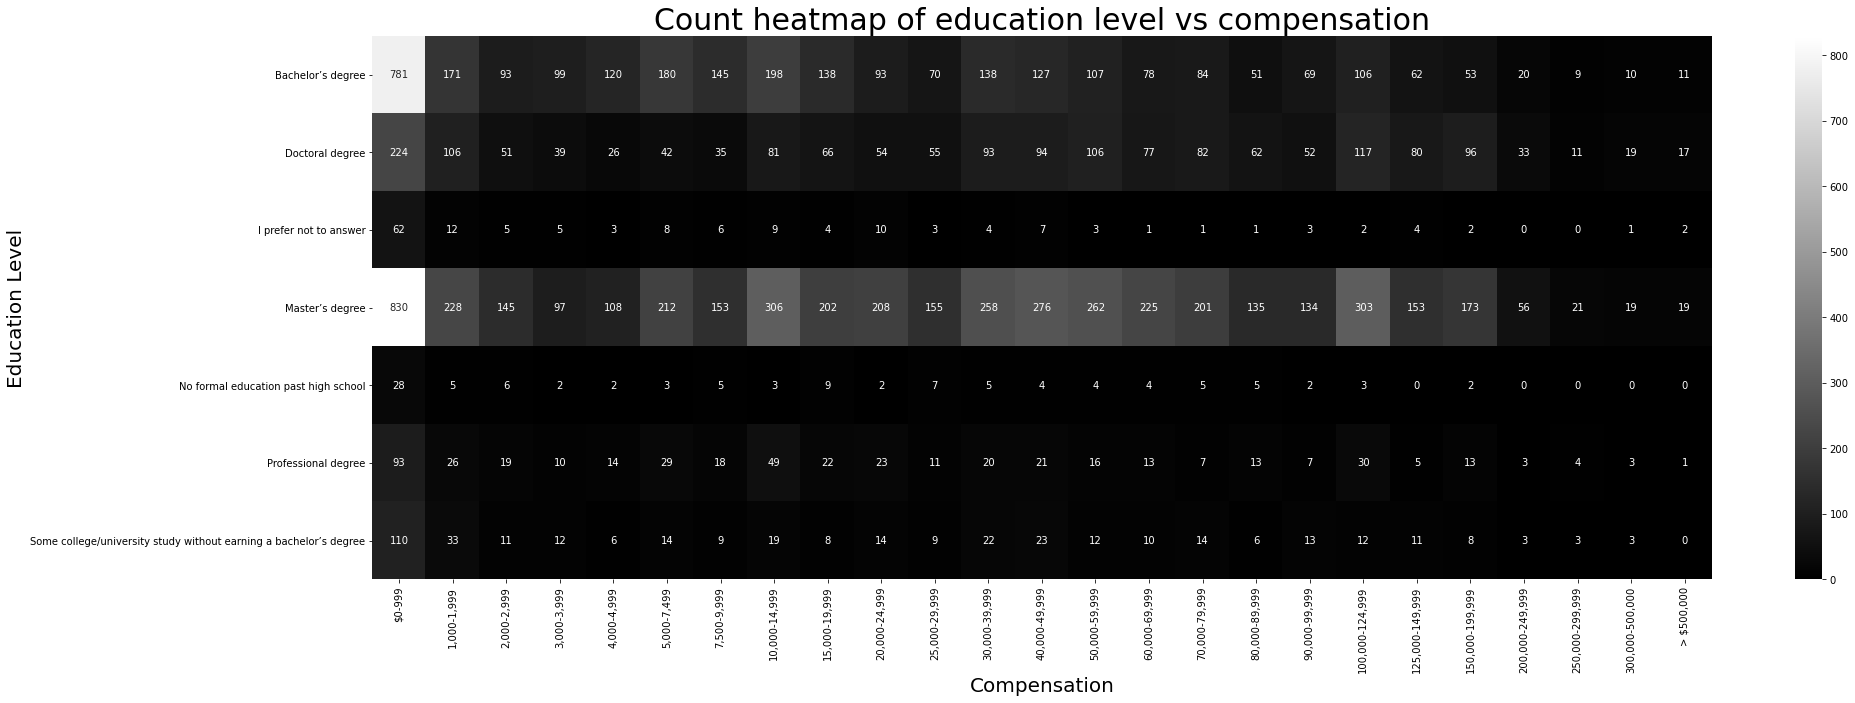

In [24]:
cm, education_lvl, compensations = cm_two_columns(df_no_nan_salary, 'Q4', 'Q24')
plt.figure(figsize=(30, 10))
sns.heatmap(pd.DataFrame(cm, index = education_lvl, columns=compensations),
            annot=True, cmap='gist_gray', fmt='g')
plt.title('Count heatmap of education level vs compensation', fontsize=30)
plt.xlabel('Compensation', fontsize=20)
plt.ylabel('Education Level', fontsize=20)
plt.show()

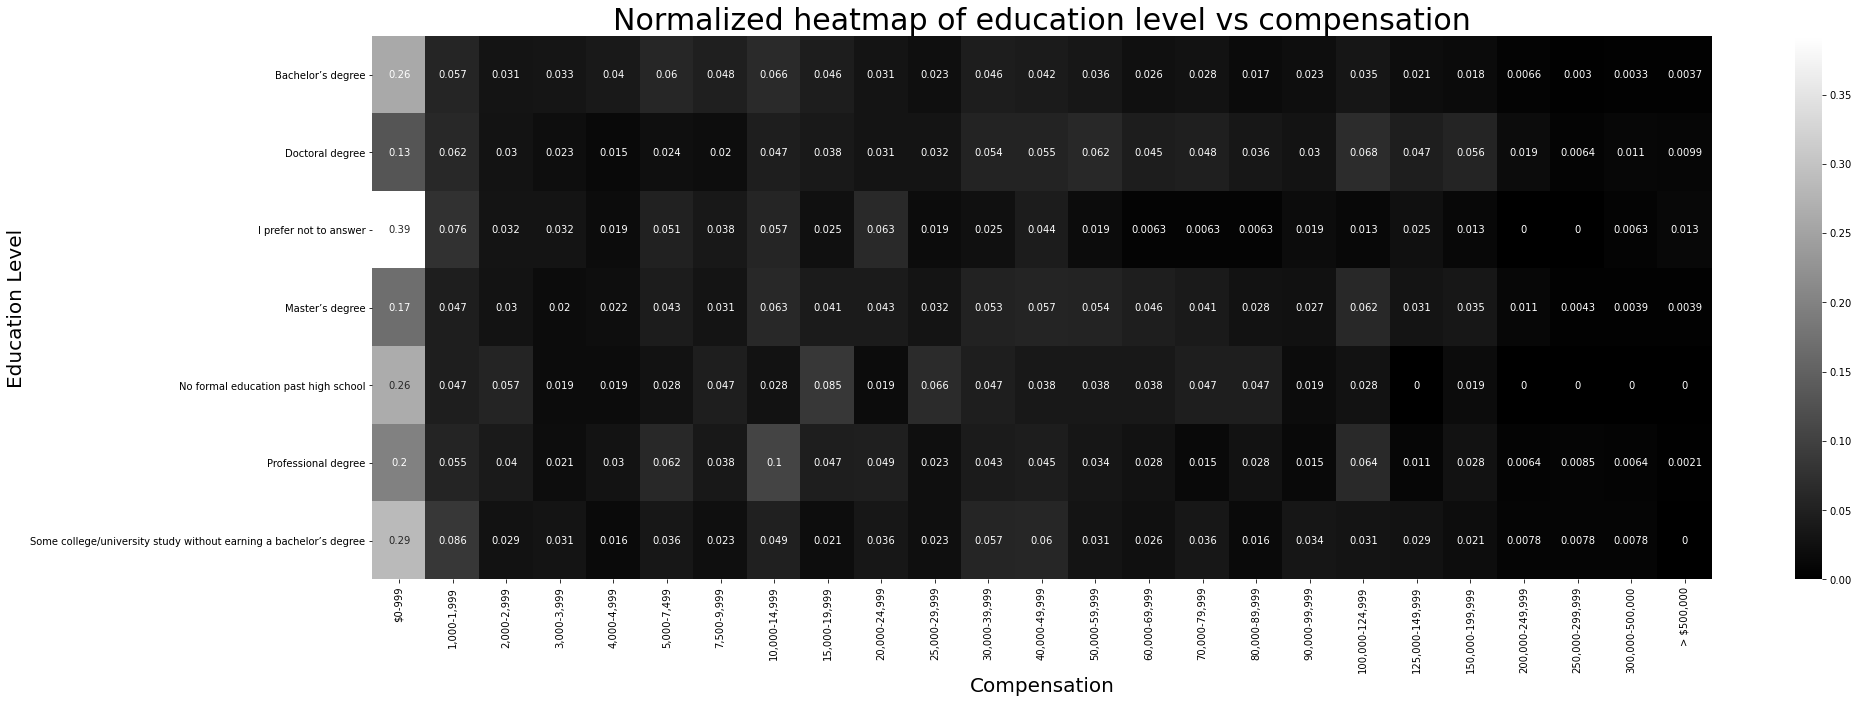

In [25]:
norm_cm, education_lvl, compensations = cm_two_columns(df_no_nan_salary, 'Q4', 'Q24', norm=True)
plt.figure(figsize=(30, 10))
sns.heatmap(pd.DataFrame(norm_cm, index = education_lvl, columns=compensations),
            annot=True, cmap='gist_gray', fmt='.2g')
plt.title('Normalized heatmap of education level vs compensation', fontsize=30)
plt.xlabel('Compensation', fontsize=20)
plt.ylabel('Education Level', fontsize=20)
plt.show()

It does look like master's and PhD degree are either reuired for or lead to higher compensation positions. Lets try and validate this conclusion via normalized histograms.

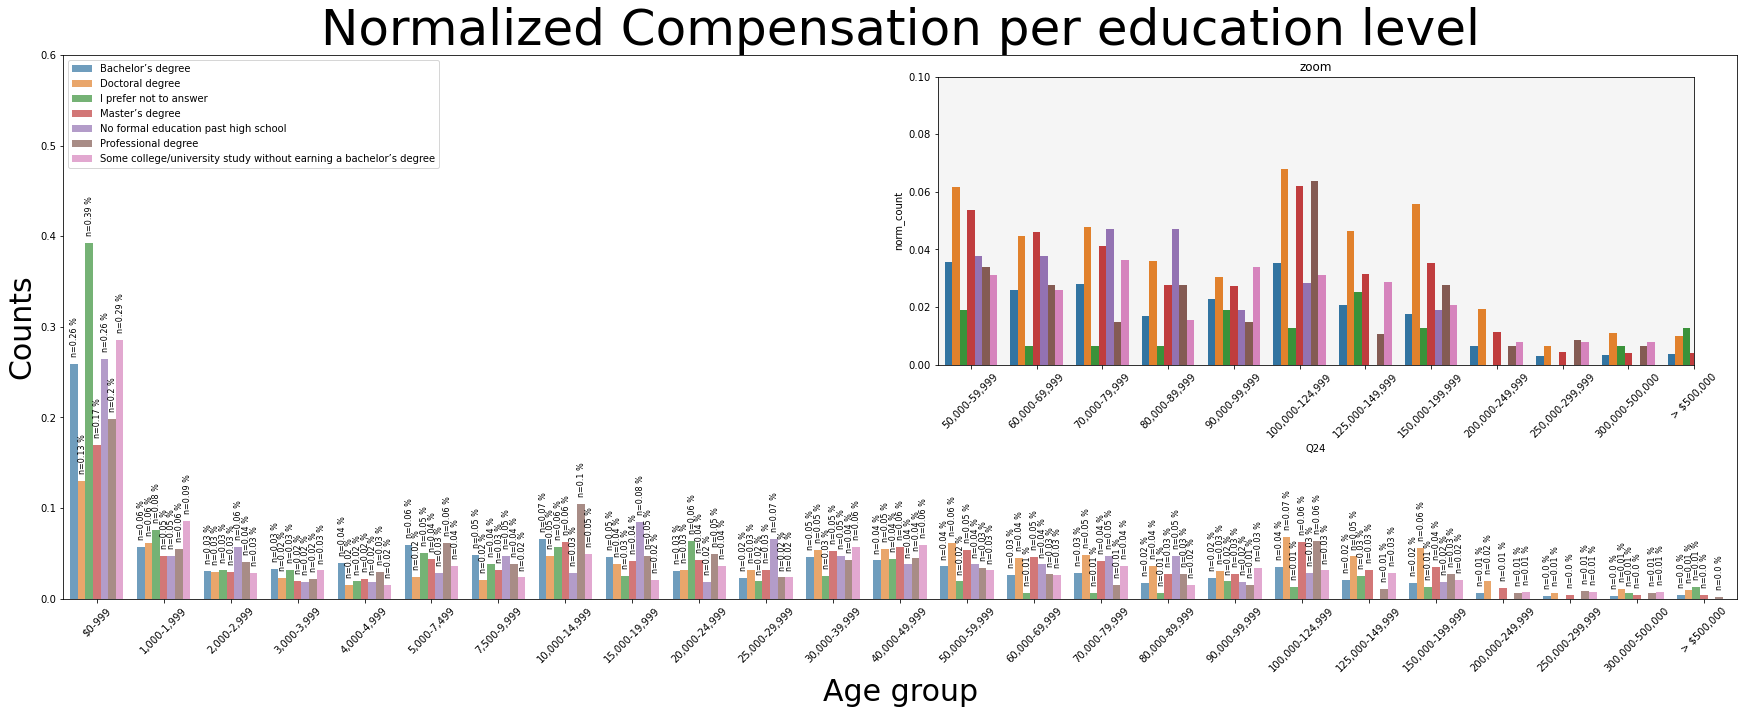

In [26]:
plt.figure(figsize=(30, 10))
df1 = df_no_nan_salary.groupby('Q4')['Q24'].value_counts(normalize=True)
df1 = df1.rename('norm_count').reset_index()
compensations = list(np.unique(df1['Q24'].values.tolist()))

ordered_compensations = [float(x.split('-')[0].split('> ')[-1].replace('$', '').replace(',', '')) for x in compensations]
compensations = [x for _, x in sorted(zip(ordered_compensations, compensations))]


ax = sns.barplot(x='Q24', y='norm_count', hue='Q4', data=df1,
                 order=compensations, alpha=0.7)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+0.01, f'n={round(height, 2)} %',
             fontsize=8, rotation=90)  

ax2 = plt.axes([0.53, 0.45, .35, .4], facecolor='whitesmoke')
sns.barplot(x='Q24', y='norm_count', hue='Q4', data=df1,
            ax=ax2, order=compensations)  
    
ax2.set_title('zoom')
ax2.set_xlim([12.5,24])
ax2.set_ylim([0, 0.1])
ax2.get_legend().remove()
ax2.tick_params(axis='x', rotation=45)

ax.set_title('Normalized Compensation per education level', fontsize=50)
ax.set_ylabel('Counts', fontsize = 30)
ax.set_xlabel('Age group', fontsize= 30)
ax.set_ylim([0, 0.6])
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')
plt.show()

Peaks of master's and doctoral degree occurs towards the higher salary range. Thus it seems that chances of getting positions with higher compensation is correlated to the education level. **Go do PhD if you havent** :P lol. 


## Now then lets look at Q7

What programming language do the people in community regularly use, this will give an indicator to what is the most in-demand programming language in the field. It is well known that a professional will need more than one language in there day to day job because different languages often used for differnt tasks. Like I myself use SQL, Python, Bash and Batch on a regular basis. But I also use HTML, CSS, JS when I do some web-development. This analysis is surely not an indicator of which language is more useful its more an indicator of which of the languages are more often used in the field. Having mentioned this let's try and analyze the response to this question to see which combination or a language is more in use in the field.

In [27]:
'''
'What programming languages do you use on a regular basis? (Select all that apply)''
- Selected Choice - 
Part-1: 'Python',
Part-2: 'R',
Part-3: 'SQL',
Part-4: 'C',
Part-5: 'C++',
Part-6: 'Java',
Part-7: 'Javascript',
Part-8: 'Julia',
Part-9: 'Swift',
Part-10: 'Bash',
Part-11: 'MATLAB',
Part-12: 'None',
OTHER: 'Other',
'''
# Dictonary with index of different people who use a language
langs_survery_idx = {'Python': [], 'R': [], 'SQL': [], 'C': [],
                   'C++': [], 'Java': [], 'Javascript': [], 'Julia': [],
                   'Swift': [], 'Bash': [], 'MATLAB': [], 'None': [],
                   'Other': []}

# Looking at Q7
df_Q7 = df[[col for col in df.columns.values.tolist() if 'Q7' in col]].copy(deep=True)
df_Q7.fillna(0, inplace=True)

for idx, row in df_Q7.iterrows():
    for key in langs_survery_idx.keys():
        if key in row.values.tolist():
            langs_survery_idx[key].append(idx)

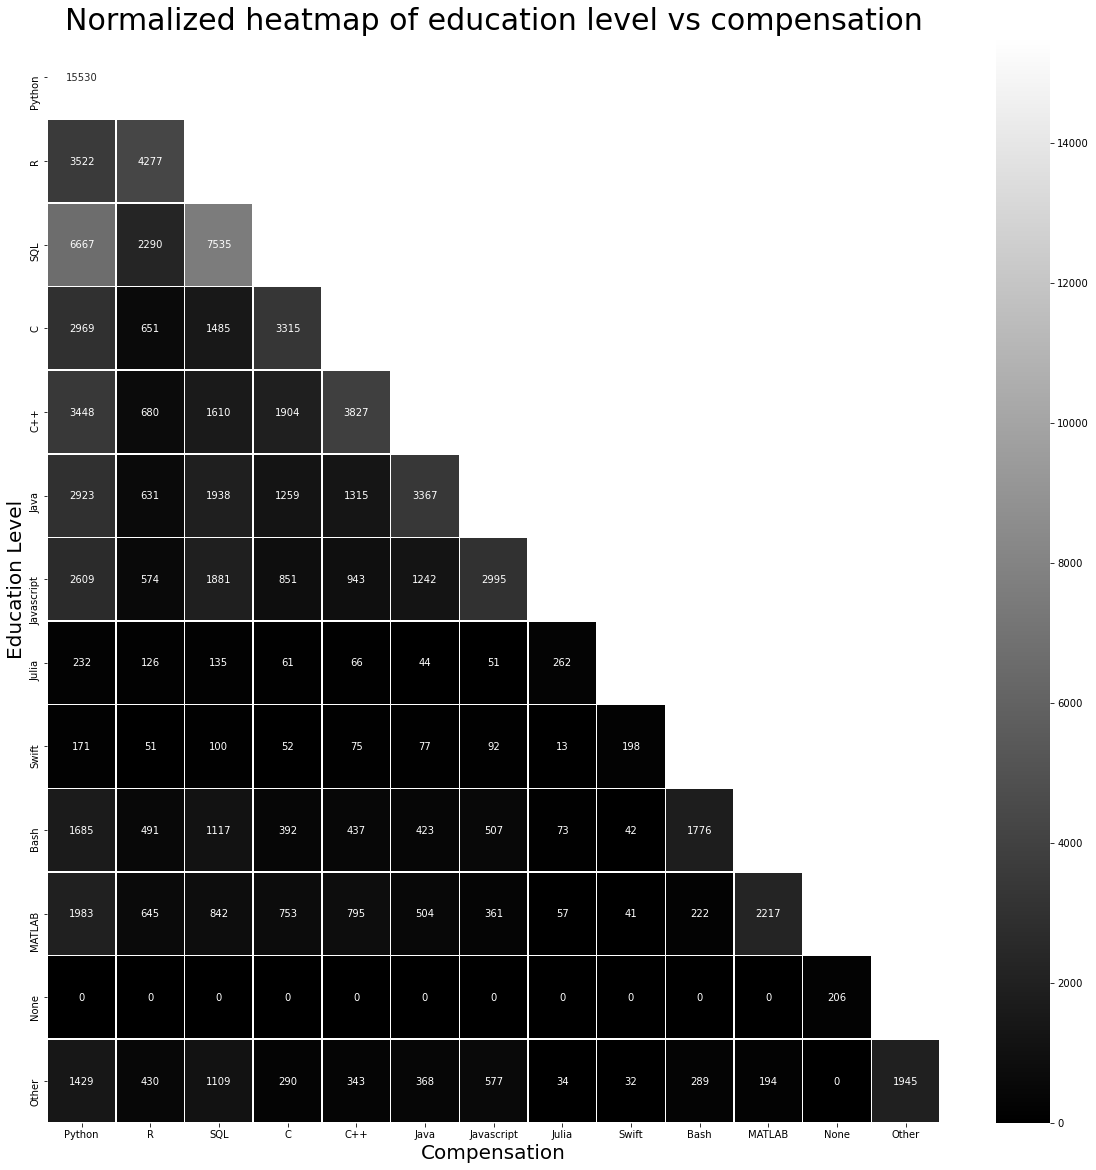

In [28]:
# Generating counts of different combinations that people are using
pair_counts = []
for lang1 in langs_survery_idx.keys():
    lang1_count = []
    for lang2 in langs_survery_idx.keys():
        lang1_count.append(len([x for x in langs_survery_idx[lang1] 
                                if x in langs_survery_idx[lang2]]))
    pair_counts.append(lang1_count)

plt.figure(figsize=(20, 20))
mask = np.zeros_like(np.array(pair_counts), dtype=np.bool)
# get the indices of the upper traingle
mask[np.triu_indices_from(mask, k=1)] = True
sns.heatmap(pd.DataFrame(pair_counts, index=langs_survery_idx.keys(),
                         columns=langs_survery_idx.keys()),
            mask=mask, annot=True, cmap='gist_gray', linewidth=0.5, fmt='g')
plt.title('Normalized heatmap of education level vs compensation', fontsize=30)
plt.xlabel('Compensation', fontsize=20)
plt.ylabel('Education Level', fontsize=20)
plt.show()

aaeee !! look at that there are a lot of python coders out there. No wonder there is so much help for everything in python. More importantly lets look at the combination (Python & SQL) and (C & SQL) are quite a popular combination. I personally use (Python and SQL) for web development and AWS automation. Seems like I am normal.

Lets look at the **Venn-Diagram** to see if there is any other significant overlap

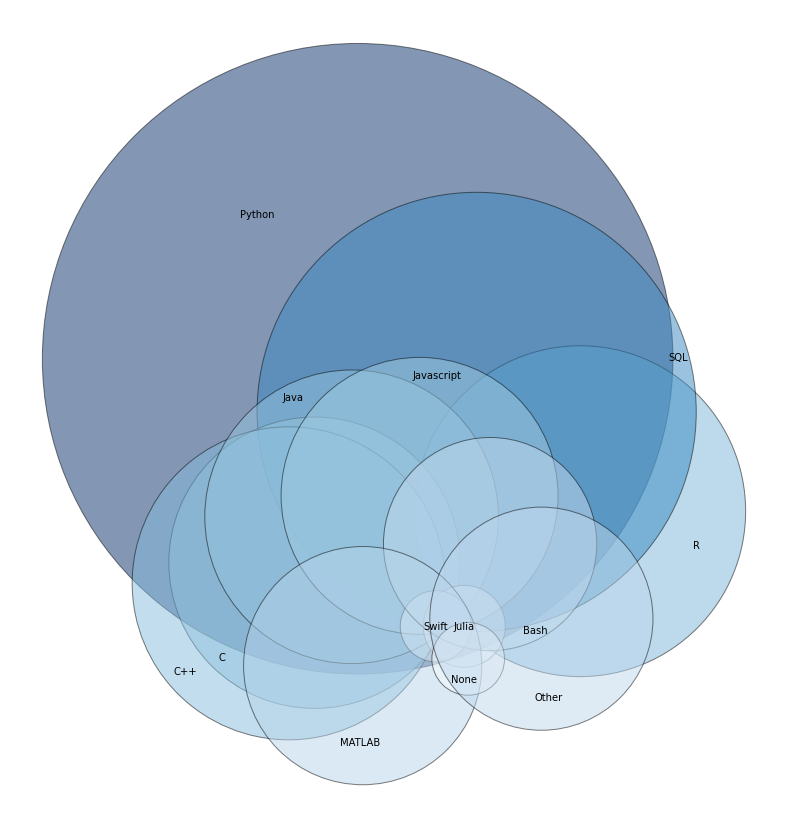

In [29]:
labels, radii, actualOverlaps, disjointOverlaps = venn.df2areas(
    df_Q7.replace(list(langs_survery_idx.keys()), 1),
    fineTune=False)
fig, ax = venn.venn(radii, actualOverlaps, disjointOverlaps,
                    labels=list(langs_survery_idx.keys()),
                    labelsize=10, cmap='Blues', fineTune=False)
fig.set_size_inches(15, 15)
plt.show()


Looks like all the Swift, Java and Javascript users also use python on a regular basis. On the other hand its very easy to see that python overlaps with almost all the languages because python is extremley easy to use and the community is extremly helpful.

## Lets now look at what people suggest

Looking at what people use in there daily life Python and SQL should dominate the recommendations.

In [30]:
# removing the NaNs and seeing the recommendations
langs, counts = np.unique([x for x in df['Q8'].values.tolist() if x==x], return_counts=True)
fig = px.pie(names=langs, values=counts,
            width=700, height=500,
            title='Recomended language distribution')
fig.show()

WoW! people are recommending R. It's good that I know R and its used more for statistical-analysis and working on forecasting and time-series models is quite easy in R. In my opinion it's used more by *staticians* and *researchers*. The languages which are recommended to begineers are without a question Python, R and SQL because they are easy to learn are very highly used in the field. Whereas C and C++ comes into picture when extremely high implementation speed is needed. MATLAB is not free but is used widely in a lot of research laboratories and has a lot of packadges specific to different fields which makes it a good choice if you want to do a PhD in a field like **bio-chemistry**. I have used it to simulate some control systems SIMULINK is extremly useful and easy to use.

## Now lets see what IDEs people use.

I personaly use PyCharm and VisualStudio it's very useful to maintain and work on a project. I also use SublimeText when the project is not too big because its extremly quick and Jupter for the notebooks. Let us see what people use

In [31]:
'''
'Which of the following integrated development environments (IDE's) do you use on a regular basis?'
(Select all that apply) - Selected Choice - 
Part_1: "Jupyter (JupyterLab, Jupyter Notebooks, etc) ",
Part_2: "RStudio ",
Part_3: "Visual Studio / Visual Studio Code",
Part_4: "Click to write Choice 13",
Part_5: "PyCharm",
Part_6: "Spyder",
Part_7: "Notepad++",
Part_8: "Sublime Text",
Part_9: "Vim / Emacs",
Part_10: "MATLAB",
Part_11: "None",
Part_OTHER: "Other",
'''
que_to_IDE = {'Part_1': 'Jupyter', 'Part_2': 'RStudio', 'Part_3': 'Visual Studio', 'Part_4': 'Visual Studio Code (VSCode)',
             'Part_5': 'PyCharm', 'Part_6': 'Spyder', 'Part_7': 'Notepad ++', 'Part_8': 'Sublime Text',
             'Part_9': 'Vim', 'Part_10': 'MATLAB', 'Part_11': 'None', 'OTHER': 'Other'}
IDE_count = {}
for col in [col for col in df.columns if 'Q9' in col]:
    IDE_count[que_to_IDE[col.replace('Q9_', '')]] = len([x for x in df[col] if x==x])

fig = px.pie(names=IDE_count.keys(), values=[IDE_count[key] for key in IDE_count.keys()],
            width=700, height=500,
            title='IDE usage distribution')
fig.show()

Jupyter, VSCode and Pycharm are clearly the favourites of the developers in the field.

## Now lets see Q10 what are peoples favourite hosted notebooks

I personal love GoogeColab beacuse it can easily be lined to GoogleDrive for large dataset without loosing the data for the next time you try to work on the project. Other than that I am only starting to use kaggle notebooks. Other than these I have used JupyterHub and paperspace. 

In [32]:
'''
'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -
'Part_1': 'Kaggle Notebooks',
'Part_2': 'Colab Notebooks',
'Part_3': 'Azure Notebooks',
'Part_4': 'Paperspace / Gradient',
'Part_5': 'Binder / JupyterHub',
'Part_6': 'Code Ocean',
'Part_7': 'IBM Watson Studio',
'Part_8': 'Amazon Sagemaker Studio',
'Part_9': 'Amazon EMR Notebooks',
'Part_10': 'Google Cloud AI Platform Notebooks',
'Part_11': 'Google Cloud Datalab Notebooks',
'Part_12': 'Databricks Collaborative Notebooks',
'Part_13': 'None',
'OTHER': 'Other',
'''

que_to_hosted_nb = {'Part_1': 'Kaggle Notebooks', 'Part_2': 'Colab Notebooks',
                    'Part_3': 'Azure Notebooks', 'Part_4': 'Paperspace / Gradient',
                    'Part_5': 'Binder / JupyterHub', 'Part_6': 'Code Ocean',
                    'Part_7': 'IBM Watson Studio', 'Part_8': 'Amazon Sagemaker Studio',
                    'Part_9': 'Amazon EMR Notebooks', 
                    'Part_10': 'Google Cloud AI Platform Notebooks',
                    'Part_11': 'Google Cloud Datalab Notebooks',
                    'Part_12': 'Databricks Collaborative Notebooks ',
                    'Part_13': 'None', 'OTHER': 'Other'}
hosted_nb_count = {}


for col in [col for col in df.columns if 'Q10' in col]:
    hosted_nb_count[que_to_hosted_nb[col.replace('Q10_', '')]] = len([x for x in df[col] if x==x])

fig = px.pie(names=hosted_nb_count.keys(),
             values=[hosted_nb_count[key] for key in hosted_nb_count.keys()],
             width=800, height=500,
             title='Hosted Notebooks usage distribution')
fig.show()

Tadaaah !!! Kaggle Notebooks and Google Colab Notebooks rock.

## Now lets dwell into Q11

What  type of computing platforms do people using, I regularly use AWS, Jetson and my PC. Each option has their own pros I prefer AWS because you can mess it up and just terminate the instance. Jetson is expensive whereas PC only has so much processing power. 

In [33]:
platforms, counts = np.unique(df['Q11'].dropna().values.tolist(), return_counts=True)
fig = px.pie(names=platforms, values=counts,
            width=1000, height=700,
            title='Distribution of differnt platform usage')
fig.show()

People are still using personal PCs I though the usage of AWS would be much more anyways this might be the case because there are a lot of students in the survey let's see what working professionals are doing.

In [34]:
platforms_no_students, counts_no_students = np.unique(df[df['Q5'] != 'Student']['Q11'].dropna().values.tolist(),
                                                      return_counts=True)

platforms_students, counts_students = np.unique(df[df['Q5'] == 'Student']['Q11'].dropna().values.tolist(),
                                                      return_counts=True)

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=platforms_no_students, values=counts_no_students,
                     name="Professionals"), 1, 1)
fig.add_trace(go.Pie(labels=platforms_students, values=counts_students,
                     name="Studetns"), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    height=700, width=1200,
    title_text="Students vs Professionals platform usage",
    annotations=[dict(text='professionals', x=0.15, y=0.5, font_size=15, showarrow=False),
                 dict(text='students', x=0.84, y=0.5, font_size=15, showarrow=False)])
fig.show()

Students are still majorly relying on personal PCs and AWS beacuse they are cheap and AWS offers free services is well (`t2.micro` EC2 instance for example). Seems like I have a lot of pie-charts, I will try and reduce pie-chart's usage from here onwards.

## Much awaited Q12

what type of specialized hardware are people using these days. Are people using TPUs and GPUs to train models


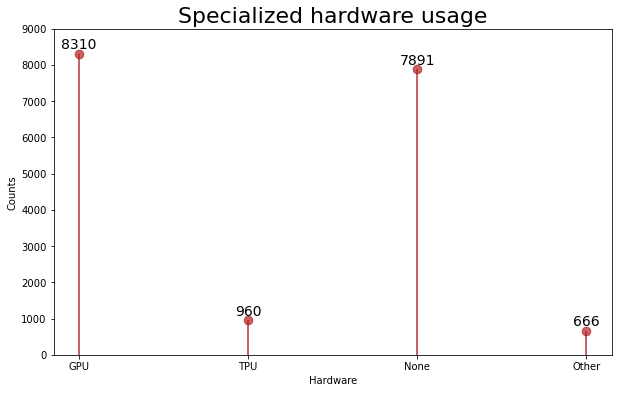

In [35]:
'''
'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -
'Part_1': 'GPU',
'Part_2': 'TPU',
'Part_3': 'None',
'OTHER': 'Other',
'''

que_to_spec_hardware = {'Part_1': 'GPU', 'Part_2': 'TPU',
                        'Part_3': 'None', 'OTHER': 'Other'}
spec_hardware_count = {}


for col in [col for col in df.columns if 'Q12' in col]:
    spec_hardware_count[que_to_spec_hardware[col.replace('Q12_', '')]] = len([x for x in df[col] if x==x])

fig, ax = plt.subplots(figsize=(10,6))
ax.vlines(x=list(spec_hardware_count.keys()), ymin=0,
          ymax=[spec_hardware_count[k] for k in spec_hardware_count.keys()],
          color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=list(spec_hardware_count.keys()),
           y=[spec_hardware_count[k] for k in spec_hardware_count.keys()],
           s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Specialized hardware usage', fontdict={'size':22})
ax.set_ylabel('Counts')
ax.set_xlabel('Hardware')
ax.set_ylim(0, 9000)

# Annotate
for row in spec_hardware_count.keys():
    ax.text(row, spec_hardware_count[row]+50,
            s=round(spec_hardware_count[row], 2),
            horizontalalignment= 'center',
            verticalalignment='bottom', fontsize=14)

plt.show()

I suspect if all the people who use GPUs are the ones who use TPUs is well whereas the ones (would like to see the overlap between TPU and GPU).

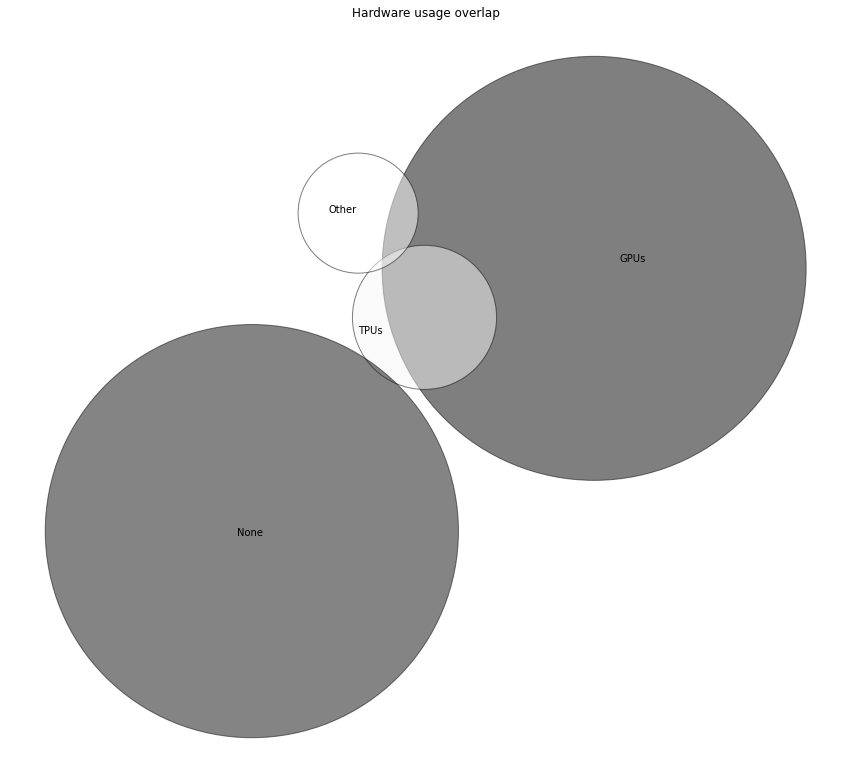

In [36]:
df_Q12 = df[[col for col in df.columns.values.tolist() if 'Q12' in col]].copy(deep=True)
df_Q12.fillna(0, inplace=True)

hardware_idx = {'GPUs': [], 'TPUs':[], 'None':[], 'Other':[]}
for idx, row in df_Q12.iterrows():
    for key in hardware_idx.keys():
        if key in row.values.tolist():
            hardware_idx[key].append(idx)
            
labels, radii, actualOverlaps, disjointOverlaps = venn.df2areas(df_Q12.replace(list(hardware_idx.keys()), 1),
                                                                fineTune=True)
fig, ax = venn.venn(radii, actualOverlaps, disjointOverlaps,
                    labels=list(hardware_idx.keys()),
                    labelsize=10, cmap='Greys', fineTune=True)
fig.set_size_inches(15, 15)
plt.title('Hardware usage overlap')
plt.show()

Ahaan !! It does look like a lot of people who use TPU also use GPU. Whereas for Other specialized hardwares it seems like the must have advantage on some thing that GPU and TPU do not help with. I recently started learning about `OpenVino` and I started using it to compress my models and enhance their speed in CPUs not a hardware but I think its pretty cool. 

## Now then lets look at Q13

How many times have people used TPUs, Is there any particular position which require extensive usage of TPU ?


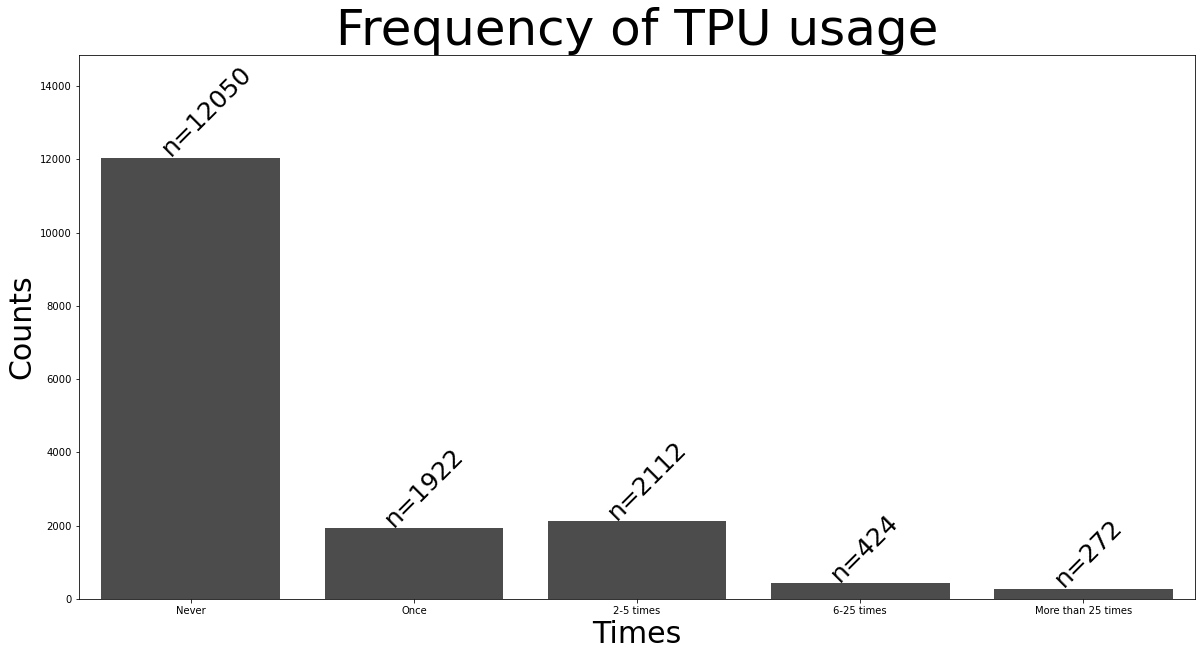

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='Q13', data=df, ax=ax,
             order=['Never', 'Once', '2-5 times', '6-25 times', 'More than 25 times'],
             color = 'black',
             alpha=0.7)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+50, 'n=%.0f'%(height), fontsize=25, rotation=45)
ax.set_title('Frequency of TPU usage', fontsize=50)
ax.set_ylabel('Counts', fontsize = 30)
ax.set_xlabel('Times', fontsize= 30)
ax.set_ylim([0, max(counts)+1500])
plt.show()

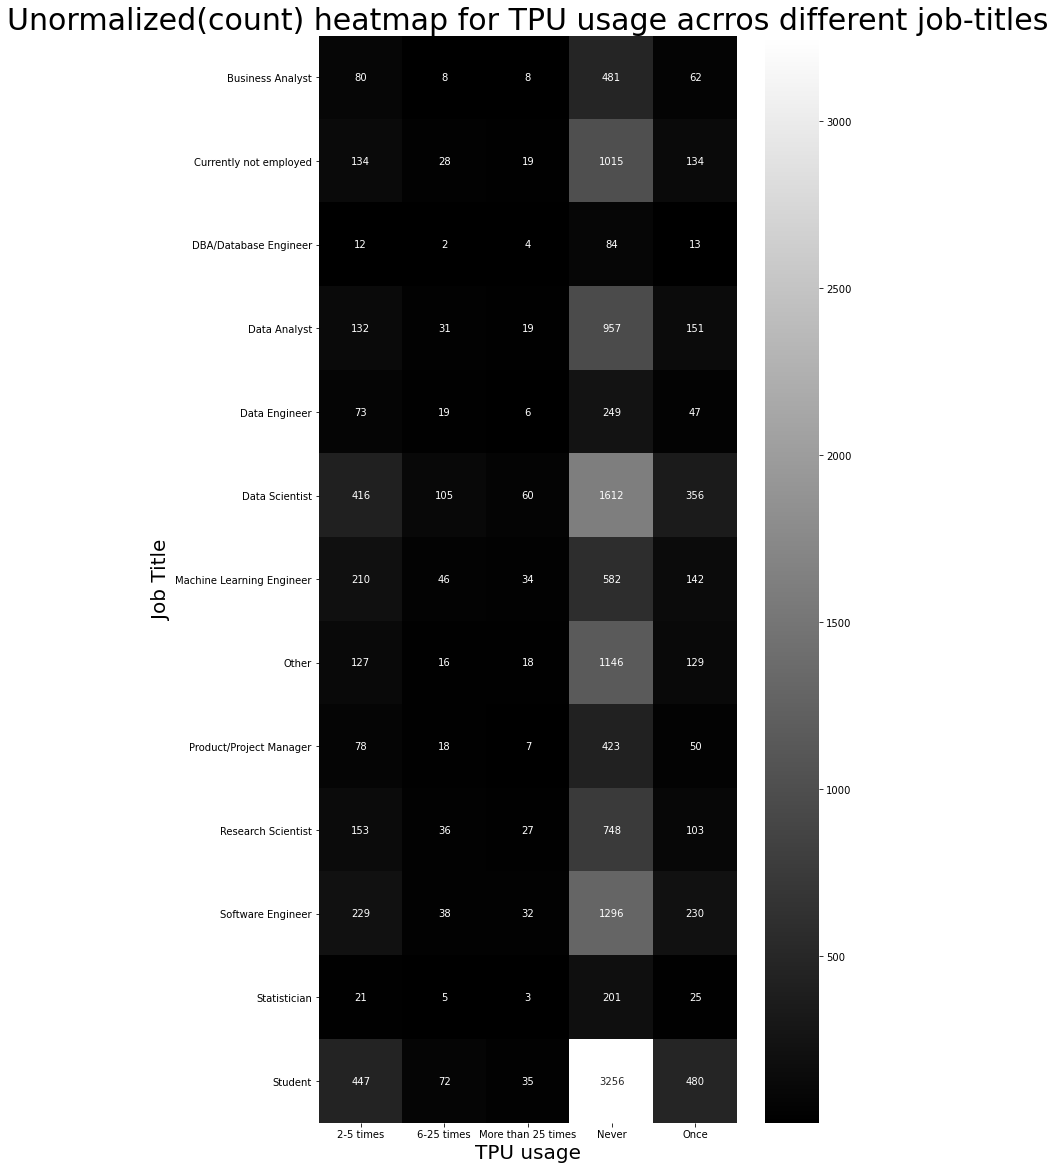

In [38]:
# seeing the sex-ratio in each country
cm, job_titles, TPU_usage = cm_two_columns(df, 'Q5', 'Q13')

plt.figure(figsize=(10, 20))
sns.heatmap(pd.DataFrame(cm, index = job_titles, columns=TPU_usage),
            annot=True, cmap='gist_gray', fmt='g', square=True)
plt.title('Unormalized(count) heatmap for TPU usage acrros different job-titles', fontsize=30)
plt.xlabel('TPU usage', fontsize=20)
plt.ylabel('Job Title', fontsize=20)
plt.show()

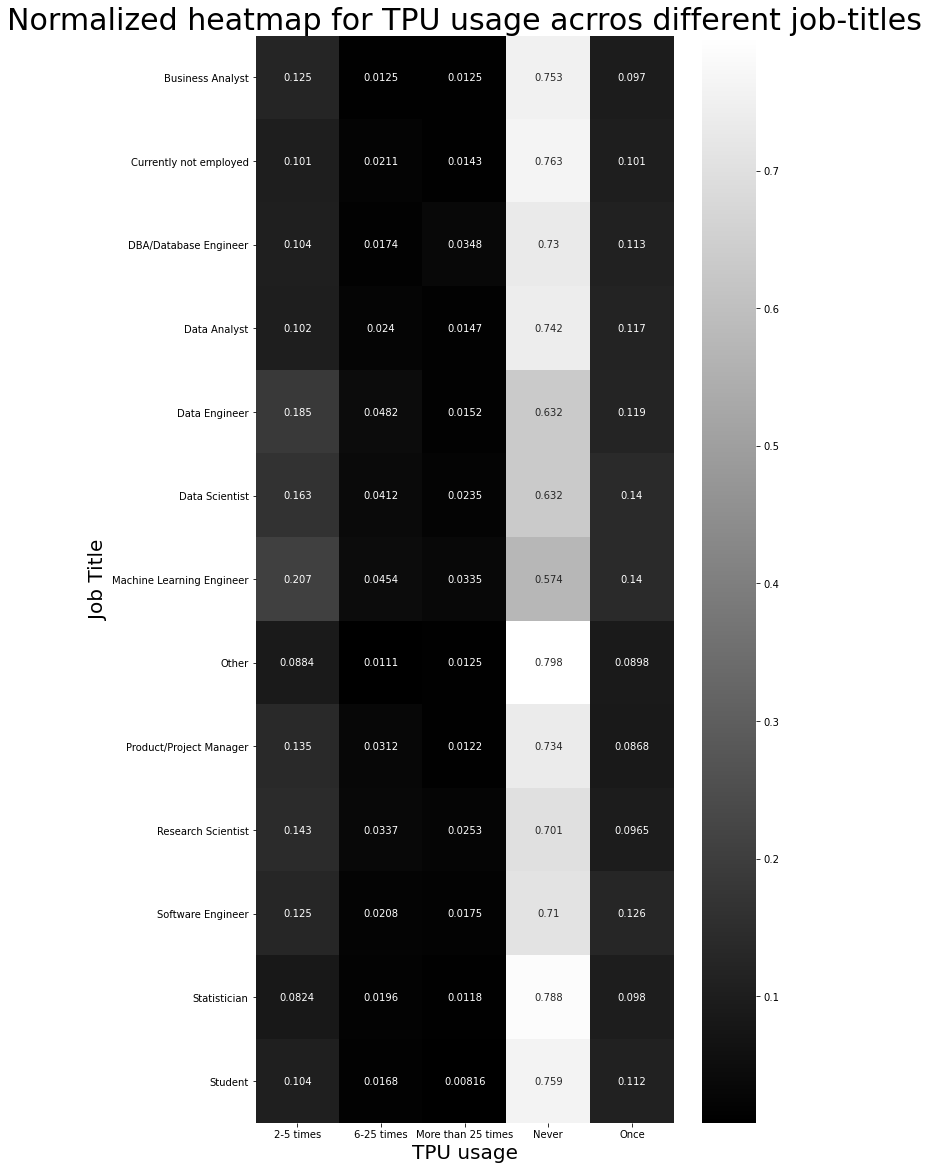

In [39]:
norm_cm, job_titles, TPU_usage = cm_two_columns(df, 'Q5', 'Q13', norm=True)

plt.figure(figsize=(10, 20))
sns.heatmap(pd.DataFrame(norm_cm, index = job_titles, columns=TPU_usage),
            annot=True, cmap='gist_gray', fmt='.3g', square=True)
plt.title('Normalized heatmap for TPU usage acrros different job-titles', fontsize=30)
plt.xlabel('TPU usage', fontsize=20)
plt.ylabel('Job Title', fontsize=20)
plt.show()

Seems like Data scientists, Machine Learning Engineers and Data Engineers are the ones who the TPU more, nothing extremly conclusive is evident though by looking at these hatmaps. But this is expected because with these roles the reducing the training-time is crucial.

## Q14 which visualization packages are more in use

Since this question is about visualization lets try and visualize the response to this question in an appealing manner. 

In [40]:
'''
'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -
'Part_1': 'Matplotlib',
'Part_2': 'Seaborn',
'Part_3': 'Plotly / Plotly Express',
'Part_4': 'Ggplot / ggplot2',
'Part_5': 'Shiny',
'Part_6': 'D3 js',
'Part_7': 'Altair',
'Part_8': 'Bokeh',
'Part_9': 'Geoplotlib',
'Part_10': 'Leaflet / Folium',
'Part_11': 'None',
'OTHER': 'Other',
'''

que_to_vis_pack = {'Part_1': 'Matplotlib', 'Part_2': 'Seaborn', 
                   'Part_3': 'Plotly / Plotly Express', 'Part_4': 'Ggplot / ggplot2', 
                   'Part_5': 'Shiny', 'Part_6': 'D3 js', 'Part_7': 'Altair',
                   'Part_8': 'Bokeh', 'Part_9': 'Geoplotlib', 'Part_10': 'Leaflet / Folium',
                   'Part_11': 'None', 'OTHER': 'Other'}
vis_pack_count = {}


for col in [col for col in df.columns if 'Q14' in col]:
    vis_pack_count[que_to_vis_pack[col.replace('Q14_', '')]] = len([x for x in df[col] if x==x])

    
df_vis_pack = pd.DataFrame()
df_vis_pack['packages'] = list(vis_pack_count.keys())
df_vis_pack['counts'] = [vis_pack_count[k] for k in vis_pack_count.keys()]

fig = px.treemap(df_vis_pack, path = ['packages'], values='counts')
fig.update_layout(
    height=600, width=800,
    title_text="Different visualization package usage")
fig.show()

Clearly `Matplotlib`, `Seaborn`, `Plotly` and `ggplot` are faviourates of people in the field. `Matplotlib` is the most commonly used but the users were allowed to enter multiple answers *(select all that apply)*, therefore its very much possible that `Matplotlib` is used even by users who use other vissualization packages. 

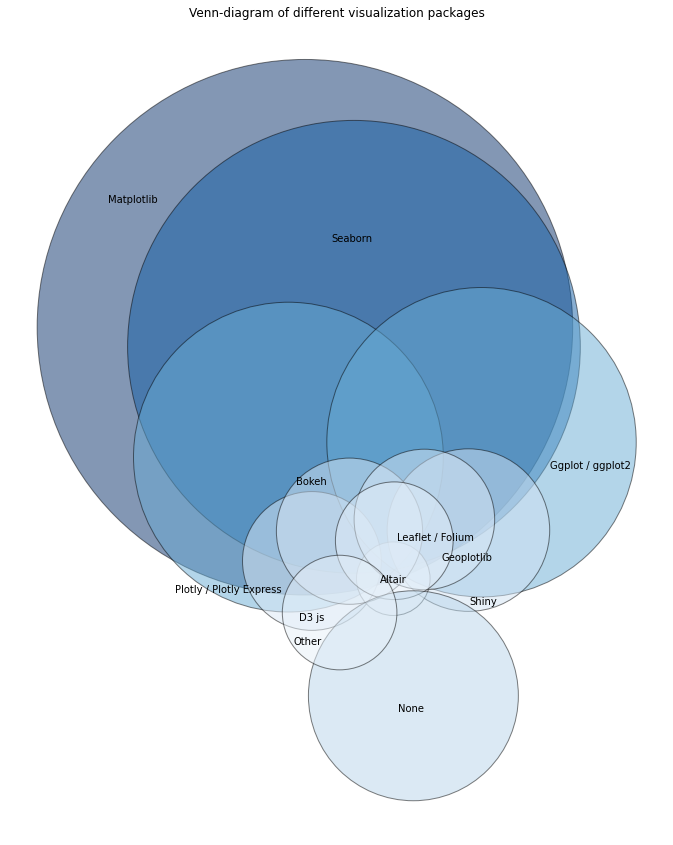

In [41]:
# Looking at Q14
df_Q14 = df[[col for col in df.columns.values.tolist() if 'Q14' in col]].copy(deep=True)
df_Q14.fillna(int(0), inplace=True)

labels, radii, actualOverlaps, disjointOverlaps = venn.df2areas(
    df_Q14.replace([' Altair ', ' Bokeh ', ' D3 js ', ' Geoplotlib ',
                    ' Ggplot / ggplot2 ', ' Leaflet / Folium ', ' Matplotlib ',
                    ' Plotly / Plotly Express ', ' Seaborn ', ' Shiny ', 'None',
                    'Other'], 1),
    fineTune=False)
fig, ax = venn.venn(radii, actualOverlaps, disjointOverlaps,
                    labels=list(vis_pack_count.keys()),
                    labelsize=10, cmap='Blues', fineTune=False)
fig.set_size_inches(15, 15)
plt.title("Venn-diagram of different visualization packages")
plt.show()

It is true then `Matplotlib` and `Seaborn` are the dominant visualization packages and as a novice I should aim to master using these two packages.


## Now lets look at Q15

Experience is something that has to be directly correlated to the compensation. Its logical right the more experienced you get the higher position and more responsitibility you are given and it should correspond to higher compensation. Let us see if this is actually the case.


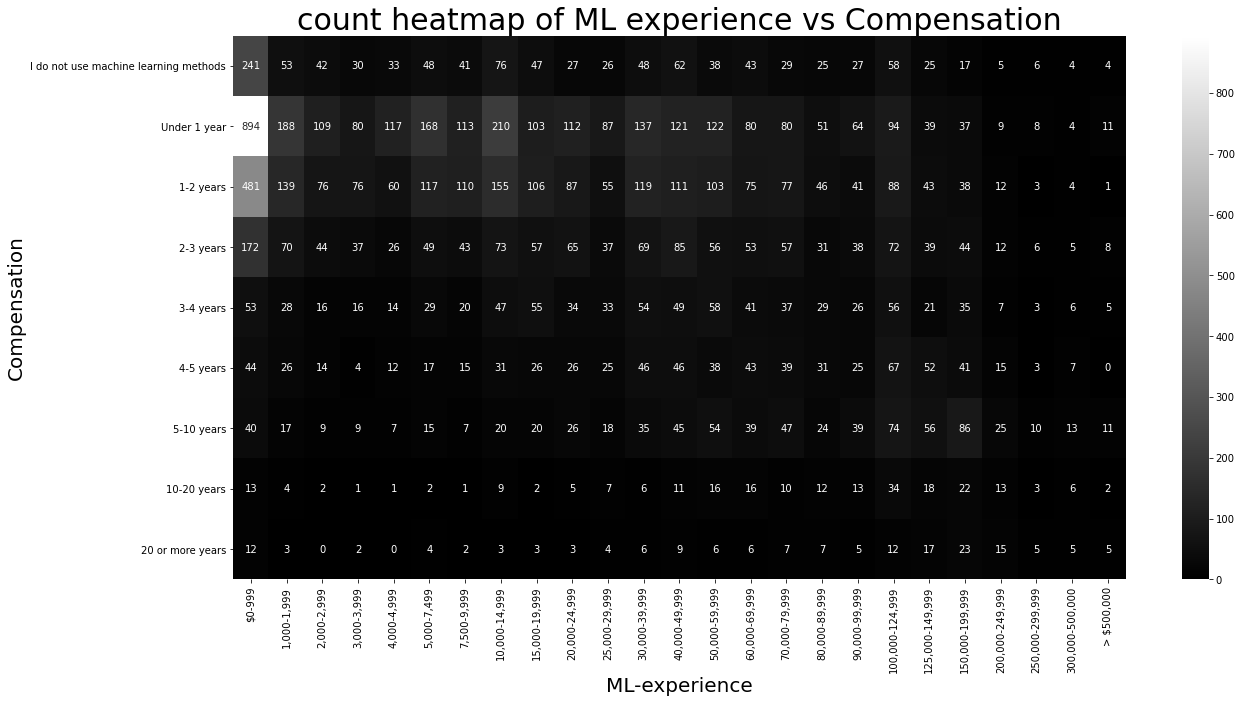

In [42]:
# seeing the sex-ratio in each country
cm, exp, comp = cm_two_columns(df, 'Q15', 'Q24')
plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(pd.DataFrame(cm, index=exp, columns=comp),
                         index=[ 'I do not use machine learning methods', 'Under 1 year','1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years', '20 or more years']),
            annot=True, cmap='gist_gray', fmt='g')
plt.title('count heatmap of ML experience vs Compensation', fontsize=30)
plt.xlabel('ML-experience', fontsize=20)
plt.ylabel('Compensation', fontsize=20)
plt.show()

The two column `Q15` and `Q24` inputs are categorical but they have sense of order in them. So to be able to see correlation between these two columns I should first encode these classes to ordered class and then look for correlation between these two columns.

In [43]:
df_Q15_Q24 = df[['Q15', 'Q24']].copy(deep=True)
# Dropping NaNs
df_Q15_Q24.dropna(inplace=True)

encoding_exp = {'I do not use machine learning methods': 0,
                'Under 1 year': 1, '1-2 years': 2, '2-3 years': 3,
                '3-4 years': 4, '4-5 years': 5, '5-10 years': 6,
                '10-20 years': 7, '20 or more years': 8}
encoding_comp = {'$0-999': 0, '1,000-1,999': 1, '2,000-2,999': 2, '3,000-3,999': 3,
                 '4,000-4,999': 4, '5,000-7,499': 5, '7,500-9,999': 6, 
                 '10,000-14,999': 7, '15,000-19,999': 8, '20,000-24,999': 9,
                 '25,000-29,999': 10, '30,000-39,999': 11, '40,000-49,999': 12,
                 '50,000-59,999': 13, '60,000-69,999': 14, '70,000-79,999': 15,
                 '80,000-89,999': 16, '90,000-99,999': 17, '100,000-124,999': 18,
                 '125,000-149,999': 19, '150,000-199,999': 20, '200,000-249,999': 21,
                 '250,000-299,999': 22, '300,000-500,000': 23, '> $500,000': 24}

df_Q15_Q24.replace({'Q15': encoding_exp, 'Q24': encoding_comp}, inplace=True)
corr = df_Q15_Q24['Q15'].corr(df_Q15_Q24['Q24'])

print(f'Correlation between the ML experience with compensation is {round(corr, 3)}')

Correlation between the ML experience with compensation is 0.356


Ahaan !! There is quite significant **(0.356)** correlation between these two columns.

# Q16

Allow it I am going to use pie-charts again to save some time.
What all machine learning platform should I focus on to excel in the field.

In [44]:
'''
'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -'
'Part_1': 'Scikit-learn',
'Part_2': 'Tensorflow',
'Part_3': 'Keras',
'Part_4': 'PyTorch',
'Part_5': 'Fast.ai',
'Part_6': 'MXNet',
'Part_7': 'Xgboost',
'Part_8': 'LightGBM',
'Part_9': 'CatBoost',
'Part_10': 'Prophet',
'Part_11': 'H2O 3',
'Part_12': 'Caret',
'Part_13': 'Tidymodels',
'Part_14': 'JAX',
'Part_15': 'None',
'OTHER': 'Other',
'''

que_to_ml_framework = {'Part_1': 'Scikit-learn', 'Part_2': 'Tensorflow',
                       'Part_3': 'Keras', 'Part_4': 'PyTorch', 'Part_5': 'Fast.ai',
                       'Part_6': 'MXNet', 'Part_7': 'Xgboost', 'Part_8': 'LightGBM',
                       'Part_9': 'CatBoost', 'Part_10': 'Prophet', 'Part_11': 'H2O 3',
                       'Part_12': 'Caret', 'Part_13': 'Tidymodels', 'Part_14': 'JAX',
                       'Part_15': 'None', 'OTHER': 'Other'}
ml_framework_count = {}

for col in [col for col in df.columns if 'Q16' in col]:
    ml_framework_count[que_to_ml_framework[col.replace('Q16_', '')]] = len([x for x in df[col] if x==x])

fig = px.pie(names=ml_framework_count.keys(),
             values=[ml_framework_count[key] for key in ml_framework_count.keys()],
             width=800, height=500,
             title='ML framework usage distribution')
fig.show()

We should focus on learning `scikit-learn`, `tensorflow`, `PyTorch`, `keras` and `XGBoost` because a lot of people already use it which means that there will be a lot of help availabel for different functions of these packades. It also must be easy to use given that a majoruty of people are using it. `XGBoost` and `LightGBM` are packages which offer gradient-boosting frameworks are more in use these days.

Lets see if professionals and students have slightly different preferences. Dropping all the rows with *NaN* as an input for **Q5**.

In [45]:
df_professionals = df[df['Q5'] != 'Student']
pro_ml_framework_count = {}

for col in [col for col in df_professionals.columns if 'Q16' in col]:
    pro_ml_framework_count[que_to_ml_framework[col.replace('Q16_', '')]] = len([x for x in df_professionals[col] if x==x])

df_students = df[df['Q5'] == 'Student']
students_ml_framework_count = {}

for col in [col for col in df_students.columns if 'Q16' in col]:
    students_ml_framework_count[que_to_ml_framework[col.replace('Q16_', '')]] = len([x for x in df_students[col] if x==x])


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=list(pro_ml_framework_count.keys()),
                     values=[pro_ml_framework_count[k] for k in 
                             pro_ml_framework_count.keys()],
                     name="Professionals"), 1, 1)
fig.add_trace(go.Pie(labels=list(students_ml_framework_count.keys()),
                     values=[students_ml_framework_count[k] for k in 
                             students_ml_framework_count.keys()],
                     name="Studetns"), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    height=500, width=800,
    title_text="Students vs Professionals ML-framework usage",
    annotations=[dict(text='professionals', x=0.14, y=0.5, font_size=15, showarrow=False),
                 dict(text='students', x=0.84, y=0.5, font_size=15, showarrow=False)])
fig.show()

Seems like students use `scikit-learn`, `tensorflow` and `keras` more than professionals. Professionals have higher percentage usage of `XGBoost` and `LightGBM` than students. Nothing too drastic and we should focus our attention to top-5/6 packadges, to be able to take the next step in our career. 

# Q17

Now lets look at the next question from the survey which can help us guide towards our journey to becoming a master. ML algorithms that we should focus in-depth attention towards.

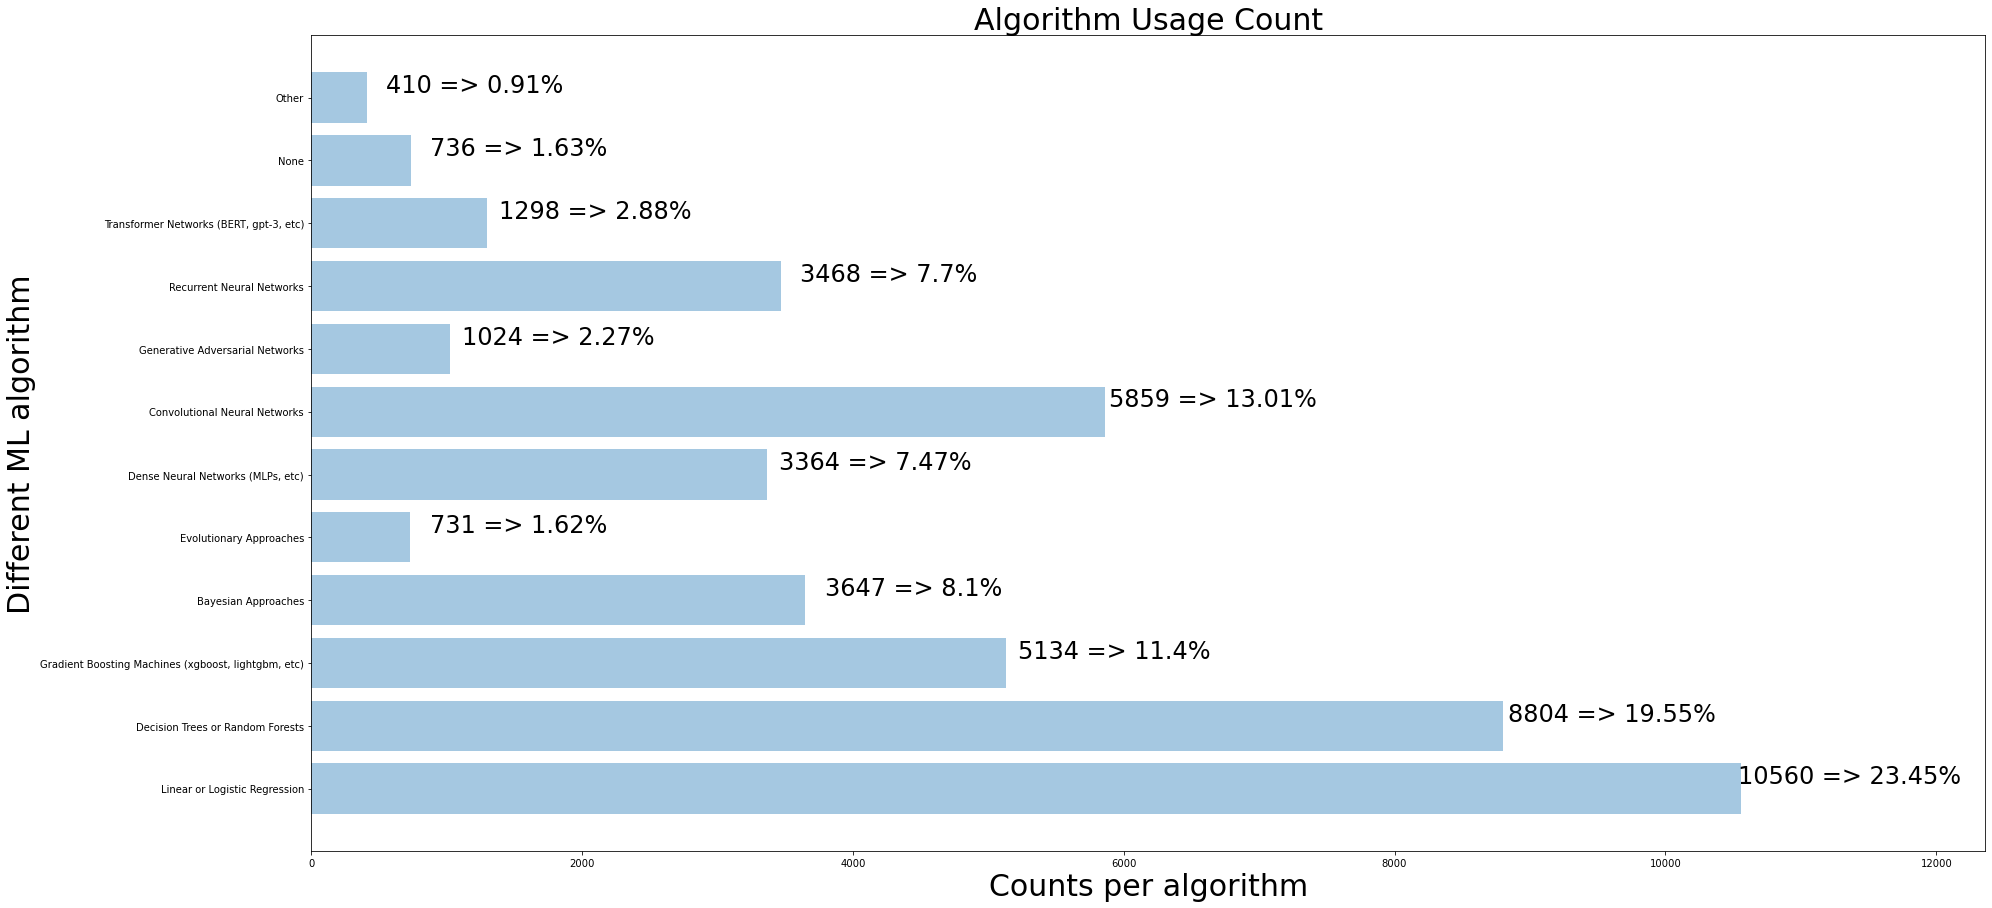

In [46]:
'''
'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice -'
'Part_1': 'Linear or Logistic Regression',
'Part_2': 'Decision Trees or Random Forests',
'Part_3': 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
'Part_4': 'Bayesian Approaches',
'Part_5': 'Evolutionary Approaches',
'Part_6': 'Dense Neural Networks (MLPs, etc)',
'Part_7': 'Convolutional Neural Networks',
'Part_8': 'Generative Adversarial Networks',
'Part_9': 'Recurrent Neural Networks',
'Part_10': 'Transformer Networks (BERT, gpt-3, etc)',
'Part_11': 'None',
'OTHER': 'Other',
'''

que_to_ml_algo = {'Part_1': 'Linear or Logistic Regression', 
                  'Part_2': 'Decision Trees or Random Forests',
                  'Part_3': 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
                  'Part_4': 'Bayesian Approaches', 'Part_5': 'Evolutionary Approaches',
                  'Part_6': 'Dense Neural Networks (MLPs, etc)',
                  'Part_7': 'Convolutional Neural Networks',
                  'Part_8': 'Generative Adversarial Networks',
                  'Part_9': 'Recurrent Neural Networks',
                  'Part_10': 'Transformer Networks (BERT, gpt-3, etc)',
                  'Part_11': 'None', 'OTHER': 'Other'}
ml_algo_count = {}

for col in [col for col in df.columns if 'Q17' in col]:
    ml_algo_count[que_to_ml_algo[col.replace('Q17_', '')]] = len([x for x in df[col] if x==x])

plt.figure(figsize=(30, 15))
plt.barh([i for i in range(len(ml_algo_count.keys()))],
         [ml_algo_count[k] for k in ml_algo_count.keys()],
         align='center', alpha=0.4)
# Annotate
total_x = np.sum(np.array([ml_algo_count[k] for k in ml_algo_count.keys()]))
for y, x in zip([i for i in range(len(ml_algo_count.keys()))],
                [ml_algo_count[k] for k in ml_algo_count.keys()]):
    plt.text(x+800, y,
            s=f'{x} => {round((x/total_x)*100, 2)}%',
            horizontalalignment= 'center',
            verticalalignment='bottom', fontsize=24)
    
plt.yticks([i for i in range(len(ml_algo_count.keys()))], list(ml_algo_count))
plt.xlabel('Counts per algorithm', fontsize=30)
plt.ylabel('Different ML algorithm', fontsize=30)
plt.title('Algorithm Usage Count', fontsize=30)
plt.xlim((0, max([ml_algo_count[k] for k in ml_algo_count.keys()])+1800))
plt.show()

It is obvious that easy and useful algorithms like `linear and logistic regression` must be use by almost every individual becuase of their ease of implementation and its usefulness. Whereas more complicated and specific algoriths like `GAN`s and `RNN`s must be in use by very few individual lets visualize this hypothesis to check if this is the case.

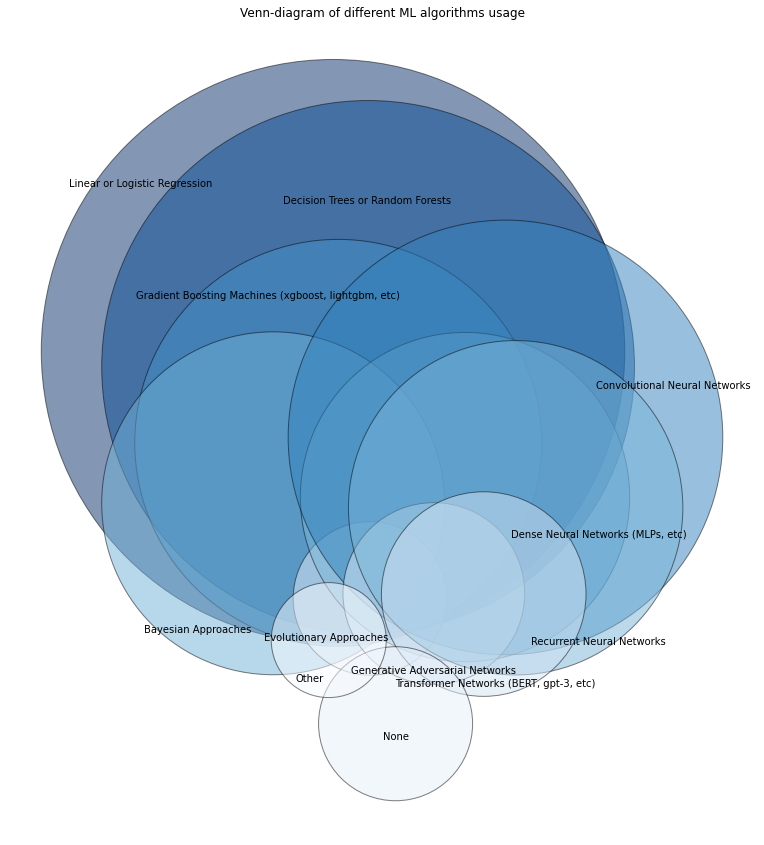

In [47]:
# Looking at Q17
df_Q17 = df[[col for col in df.columns.values.tolist() if 'Q17' in col]].copy(deep=True)
df_Q17.fillna(int(0), inplace=True)

labels, radii, actualOverlaps, disjointOverlaps = venn.df2areas(
    df_Q17.replace(['Bayesian Approaches', 'Convolutional Neural Networks',
                    'Decision Trees or Random Forests',
                    'Dense Neural Networks (MLPs, etc)', 'Evolutionary Approaches',
                    'Generative Adversarial Networks',
                    'Gradient Boosting Machines (xgboost, lightgbm, etc)',
                    'Linear or Logistic Regression', 'None', 'Other',
                    'Recurrent Neural Networks',
                    'Transformer Networks (BERT, gpt-3, etc)'], 1),
    fineTune=False)
fig, ax = venn.venn(radii, actualOverlaps, disjointOverlaps,
                    labels=list(ml_algo_count.keys()),
                    labelsize=10, cmap='Blues', fineTune=False)
fig.set_size_inches(15, 15)
plt.title("Venn-diagram of different ML algorithms usage")
plt.show()

The visualziation indeed confirms this and basic approaches like `LR` and `DT` are almost used by everyone in the field. Therefore mastering them should be novice's priority and thery are the basic algorithm which should be easy to learn for anyone.


That brings an end to this basic analysis of the kaggle-survey-2020. I have tried analysing the questions I felt were useful for me. I did learn quite a few new things analysing this survey. 

It's only my first notebook and pardon me for its length. I have tried to be eloborative. In future I will try and stick to the story mode of a notebook answering a very specific question for a survery like this because those notebooks seem to be doing well in kaggle-competetions. Lets see where this will land me.


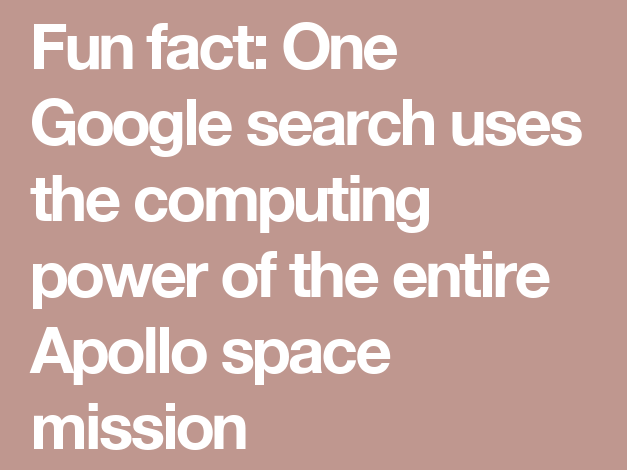

# <center> THE END </center>